In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

import warnings
warnings.filterwarnings('ignore')

import datetime as dt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [2]:
safaricom= pd.read_csv("../../Documents/safaricom.csv")
equity=pd.read_csv("../../Documents/equity.csv")
BAT=pd.read_csv("../../Documents/BAT.csv")
KCB=pd.read_csv("../../Documents/KCB.csv")
EABL=pd.read_csv("../../Documents/EABL.csv")

In [3]:
KCB['Date']=pd.to_datetime(KCB['Date'])
BAT['Date']=pd.to_datetime(BAT['Date'])
EABL['Date']=pd.to_datetime(EABL['Date'])
safaricom['Date']=pd.to_datetime(safaricom['Date'])
equity['Date']=pd.to_datetime(equity['Date'])

In [4]:
safaricom.head()

,Date,Open,High,Low,Close,VWAP,Adj VWAP,Volume
0,2015-01-02,14.10,14.5,14.05,14.20,14.15,14.15,8652000.0
1,2015-01-05,14.15,14.3,14.00,14.00,14.05,14.05,2558100.0
2,2015-01-06,14.00,14.1,13.80,13.80,13.90,13.90,11810700.0
3,2015-01-07,14.00,14.0,13.80,13.85,13.85,13.85,5022200.0
4,2015-01-08,13.85,13.9,13.60,13.70,13.75,13.75,3746400.0


In [5]:
safaricom_new=safaricom.drop(['VWAP', 'Adj VWAP', 'Volume'], axis=1)
equity_new=equity.drop(['VWAP', 'Adjusted', 'Volume'], axis=1)
KCB_new=KCB.drop(['VWAP', 'Adjusted', 'Volume'], axis=1)
BAT_new=BAT.drop(['VWAP', 'Adjusted', 'Volume'], axis=1)
EABL_new=EABL.drop(['VWAP', 'Adjusted', 'Volume'], axis=1)

Data ProProcessing

In [123]:
def Dataset(Data, Date):

  Train_Data = Data['Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y, Test_Data

In [124]:


def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])

  return model



In [125]:

model = Model()

In [126]:
tf.keras.utils.plot_model(model, show_shapes=True)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# Custom Learning Rate

In [127]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

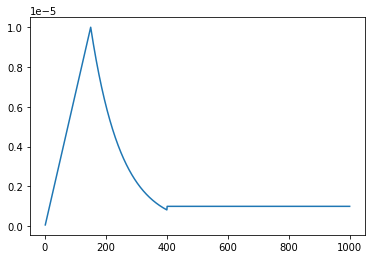

In [128]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [129]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Safaricom

In [130]:
safaricom.head()

,Date,Open,High,Low,Close,VWAP,Adj VWAP,Volume
0,2015-01-02,14.10,14.5,14.05,14.20,14.15,14.15,8652000.0
1,2015-01-05,14.15,14.3,14.00,14.00,14.05,14.05,2558100.0
2,2015-01-06,14.00,14.1,13.80,13.80,13.90,13.90,11810700.0
3,2015-01-07,14.00,14.0,13.80,13.85,13.85,13.85,5022200.0
4,2015-01-08,13.85,13.9,13.60,13.70,13.75,13.75,3746400.0


In [131]:
safaricom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1598 non-null   datetime64[ns]
 1   Open      1598 non-null   float64       
 2   High      1598 non-null   float64       
 3   Low       1598 non-null   float64       
 4   Close     1598 non-null   float64       
 5   VWAP      1598 non-null   float64       
 6   Adj VWAP  1598 non-null   float64       
 7   Volume    1598 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 100.0 KB


In [133]:
Safaricom_Date = '2020-10-12'
Safaricom_Train_X, Safaricom_Train_Y, Safaricom_Test_X, Safaricom_Test_Y, Safaricom_Test_Data = Dataset(safaricom, Safaricom_Date)

# Model Fitting

In [134]:

Safaricom_Model= Model()

In [135]:
Safaricom_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [136]:
Safaricom_Model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 5, 200)            161600    
_________________________________________________________________
lstm_11 (LSTM)               (None, 200)               320800    
_________________________________________________________________
dense_20 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_22 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 255       
Total params: 548,005
Trainable params: 548,005
Non-trainable params: 0
________________________________________________

In [137]:


Safaricom_hist = Safaricom_Model.fit(Safaricom_Train_X, Safaricom_Train_Y, epochs = 1000, validation_data = (Safaricom_Test_X, Safaricom_Test_Y), callbacks=[callback])



Epoch 1/1000
9/9 [==============================] - 3s 119ms/step - loss: 564.6704 - root_mean_squared_error: 23.7628 - val_loss: 1299.6857 - val_root_mean_squared_error: 36.0512
Epoch 2/1000
9/9 [==============================] - 0s 29ms/step - loss: 564.6667 - root_mean_squared_error: 23.7627 - val_loss: 1299.6633 - val_root_mean_squared_error: 36.0508
Epoch 3/1000
9/9 [==============================] - 0s 27ms/step - loss: 564.6546 - root_mean_squared_error: 23.7625 - val_loss: 1299.6190 - val_root_mean_squared_error: 36.0502
Epoch 4/1000
9/9 [==============================] - 0s 30ms/step - loss: 564.6346 - root_mean_squared_error: 23.7620 - val_loss: 1299.5522 - val_root_mean_squared_error: 36.0493
Epoch 5/1000
9/9 [==============================] - 0s 28ms/step - loss: 564.6066 - root_mean_squared_error: 23.7615 - val_loss: 1299.4623 - val_root_mean_squared_error: 36.0481
Epoch 6/1000
9/9 [==============================] - 0s 31ms/step - loss: 564.5693 - root_mean_squared_error: 

Epoch 47/1000
9/9 [==============================] - 0s 22ms/step - loss: 554.0775 - root_mean_squared_error: 23.5389 - val_loss: 1270.2476 - val_root_mean_squared_error: 35.6405
Epoch 48/1000
9/9 [==============================] - 0s 22ms/step - loss: 553.4104 - root_mean_squared_error: 23.5247 - val_loss: 1268.4200 - val_root_mean_squared_error: 35.6149
Epoch 49/1000
9/9 [==============================] - 0s 23ms/step - loss: 552.7148 - root_mean_squared_error: 23.5099 - val_loss: 1266.4790 - val_root_mean_squared_error: 35.5876
Epoch 50/1000
9/9 [==============================] - 0s 22ms/step - loss: 551.9854 - root_mean_squared_error: 23.4944 - val_loss: 1264.4456 - val_root_mean_squared_error: 35.5590
Epoch 51/1000
9/9 [==============================] - 0s 22ms/step - loss: 551.2221 - root_mean_squared_error: 23.4781 - val_loss: 1262.2595 - val_root_mean_squared_error: 35.5283
Epoch 52/1000
9/9 [==============================] - 0s 22ms/step - loss: 550.3873 - root_mean_squared_er

Epoch 93/1000
9/9 [==============================] - 0s 28ms/step - loss: 240.3520 - root_mean_squared_error: 15.5033 - val_loss: 391.3633 - val_root_mean_squared_error: 19.7829
Epoch 94/1000
9/9 [==============================] - 0s 24ms/step - loss: 220.0897 - root_mean_squared_error: 14.8354 - val_loss: 370.3449 - val_root_mean_squared_error: 19.2443
Epoch 95/1000
9/9 [==============================] - 0s 22ms/step - loss: 203.3299 - root_mean_squared_error: 14.2594 - val_loss: 365.0971 - val_root_mean_squared_error: 19.1075
Epoch 96/1000
9/9 [==============================] - 0s 22ms/step - loss: 190.1965 - root_mean_squared_error: 13.7912 - val_loss: 374.1647 - val_root_mean_squared_error: 19.3433
Epoch 97/1000
9/9 [==============================] - 0s 24ms/step - loss: 181.2041 - root_mean_squared_error: 13.4612 - val_loss: 392.1584 - val_root_mean_squared_error: 19.8030
Epoch 98/1000
9/9 [==============================] - 0s 24ms/step - loss: 175.6004 - root_mean_squared_error: 

9/9 [==============================] - 0s 25ms/step - loss: 15.1637 - root_mean_squared_error: 3.8941 - val_loss: 31.7027 - val_root_mean_squared_error: 5.6305
Epoch 140/1000
9/9 [==============================] - 0s 24ms/step - loss: 14.3440 - root_mean_squared_error: 3.7873 - val_loss: 28.2110 - val_root_mean_squared_error: 5.3114
Epoch 141/1000
9/9 [==============================] - 0s 23ms/step - loss: 13.5966 - root_mean_squared_error: 3.6874 - val_loss: 25.5730 - val_root_mean_squared_error: 5.0570
Epoch 142/1000
9/9 [==============================] - 0s 24ms/step - loss: 12.8893 - root_mean_squared_error: 3.5902 - val_loss: 23.3159 - val_root_mean_squared_error: 4.8287
Epoch 143/1000
9/9 [==============================] - 0s 25ms/step - loss: 12.2711 - root_mean_squared_error: 3.5030 - val_loss: 21.3699 - val_root_mean_squared_error: 4.6228
Epoch 144/1000
9/9 [==============================] - 0s 27ms/step - loss: 11.6477 - root_mean_squared_error: 3.4129 - val_loss: 19.2571 - v

Epoch 186/1000
9/9 [==============================] - 0s 24ms/step - loss: 1.6241 - root_mean_squared_error: 1.2744 - val_loss: 4.7843 - val_root_mean_squared_error: 2.1873
Epoch 187/1000
9/9 [==============================] - 0s 23ms/step - loss: 1.5922 - root_mean_squared_error: 1.2618 - val_loss: 4.7049 - val_root_mean_squared_error: 2.1691
Epoch 188/1000
9/9 [==============================] - 0s 24ms/step - loss: 1.5602 - root_mean_squared_error: 1.2491 - val_loss: 5.0715 - val_root_mean_squared_error: 2.2520
Epoch 189/1000
9/9 [==============================] - 0s 23ms/step - loss: 1.5301 - root_mean_squared_error: 1.2370 - val_loss: 5.2277 - val_root_mean_squared_error: 2.2864
Epoch 190/1000
9/9 [==============================] - 0s 22ms/step - loss: 1.5031 - root_mean_squared_error: 1.2260 - val_loss: 5.2948 - val_root_mean_squared_error: 2.3010
Epoch 191/1000
9/9 [==============================] - 0s 25ms/step - loss: 1.4787 - root_mean_squared_error: 1.2160 - val_loss: 5.4170 

9/9 [==============================] - 0s 27ms/step - loss: 1.1364 - root_mean_squared_error: 1.0660 - val_loss: 6.6338 - val_root_mean_squared_error: 2.5756
Epoch 234/1000
9/9 [==============================] - 0s 25ms/step - loss: 1.1335 - root_mean_squared_error: 1.0646 - val_loss: 6.6127 - val_root_mean_squared_error: 2.5715
Epoch 235/1000
9/9 [==============================] - 0s 26ms/step - loss: 1.1307 - root_mean_squared_error: 1.0633 - val_loss: 6.5779 - val_root_mean_squared_error: 2.5647
Epoch 236/1000
9/9 [==============================] - 0s 23ms/step - loss: 1.1286 - root_mean_squared_error: 1.0623 - val_loss: 6.5547 - val_root_mean_squared_error: 2.5602
Epoch 237/1000
9/9 [==============================] - 0s 25ms/step - loss: 1.1259 - root_mean_squared_error: 1.0611 - val_loss: 6.5315 - val_root_mean_squared_error: 2.5557
Epoch 238/1000
9/9 [==============================] - 0s 24ms/step - loss: 1.1231 - root_mean_squared_error: 1.0598 - val_loss: 6.5687 - val_root_mean

9/9 [==============================] - 0s 27ms/step - loss: 1.0587 - root_mean_squared_error: 1.0289 - val_loss: 6.0896 - val_root_mean_squared_error: 2.4677
Epoch 281/1000
9/9 [==============================] - 0s 24ms/step - loss: 1.0581 - root_mean_squared_error: 1.0287 - val_loss: 6.0262 - val_root_mean_squared_error: 2.4548
Epoch 282/1000
9/9 [==============================] - 0s 23ms/step - loss: 1.0563 - root_mean_squared_error: 1.0278 - val_loss: 6.0561 - val_root_mean_squared_error: 2.4609
Epoch 283/1000
9/9 [==============================] - 0s 23ms/step - loss: 1.0553 - root_mean_squared_error: 1.0273 - val_loss: 6.0294 - val_root_mean_squared_error: 2.4555
Epoch 284/1000
9/9 [==============================] - 0s 25ms/step - loss: 1.0545 - root_mean_squared_error: 1.0269 - val_loss: 6.0124 - val_root_mean_squared_error: 2.4520
Epoch 285/1000
9/9 [==============================] - 0s 27ms/step - loss: 1.0538 - root_mean_squared_error: 1.0265 - val_loss: 5.9837 - val_root_mean

9/9 [==============================] - 0s 24ms/step - loss: 1.0238 - root_mean_squared_error: 1.0118 - val_loss: 5.5914 - val_root_mean_squared_error: 2.3646
Epoch 328/1000
9/9 [==============================] - 0s 23ms/step - loss: 1.0231 - root_mean_squared_error: 1.0115 - val_loss: 5.6451 - val_root_mean_squared_error: 2.3759
Epoch 329/1000
9/9 [==============================] - 0s 23ms/step - loss: 1.0225 - root_mean_squared_error: 1.0112 - val_loss: 5.6486 - val_root_mean_squared_error: 2.3767
Epoch 330/1000
9/9 [==============================] - 0s 24ms/step - loss: 1.0219 - root_mean_squared_error: 1.0109 - val_loss: 5.6487 - val_root_mean_squared_error: 2.3767
Epoch 331/1000
9/9 [==============================] - 0s 23ms/step - loss: 1.0219 - root_mean_squared_error: 1.0109 - val_loss: 5.6472 - val_root_mean_squared_error: 2.3764
Epoch 332/1000
9/9 [==============================] - 0s 23ms/step - loss: 1.0212 - root_mean_squared_error: 1.0105 - val_loss: 5.5990 - val_root_mean

9/9 [==============================] - 0s 22ms/step - loss: 1.0047 - root_mean_squared_error: 1.0024 - val_loss: 5.3972 - val_root_mean_squared_error: 2.3232
Epoch 375/1000
9/9 [==============================] - 0s 24ms/step - loss: 1.0046 - root_mean_squared_error: 1.0023 - val_loss: 5.3961 - val_root_mean_squared_error: 2.3229
Epoch 376/1000
9/9 [==============================] - 0s 24ms/step - loss: 1.0051 - root_mean_squared_error: 1.0025 - val_loss: 5.3630 - val_root_mean_squared_error: 2.3158
Epoch 377/1000
9/9 [==============================] - 0s 25ms/step - loss: 1.0035 - root_mean_squared_error: 1.0017 - val_loss: 5.3786 - val_root_mean_squared_error: 2.3192
Epoch 378/1000
9/9 [==============================] - 0s 24ms/step - loss: 1.0034 - root_mean_squared_error: 1.0017 - val_loss: 5.3625 - val_root_mean_squared_error: 2.3157
Epoch 379/1000
9/9 [==============================] - 0s 23ms/step - loss: 1.0029 - root_mean_squared_error: 1.0014 - val_loss: 5.3920 - val_root_mean

9/9 [==============================] - 0s 24ms/step - loss: 0.9921 - root_mean_squared_error: 0.9960 - val_loss: 5.2028 - val_root_mean_squared_error: 2.2810
Epoch 422/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.9913 - root_mean_squared_error: 0.9956 - val_loss: 5.2210 - val_root_mean_squared_error: 2.2850
Epoch 423/1000
9/9 [==============================] - 0s 21ms/step - loss: 0.9915 - root_mean_squared_error: 0.9958 - val_loss: 5.1815 - val_root_mean_squared_error: 2.2763
Epoch 424/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.9919 - root_mean_squared_error: 0.9960 - val_loss: 5.2437 - val_root_mean_squared_error: 2.2899
Epoch 425/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.9906 - root_mean_squared_error: 0.9953 - val_loss: 5.2079 - val_root_mean_squared_error: 2.2821
Epoch 426/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.9903 - root_mean_squared_error: 0.9952 - val_loss: 5.2045 - val_root_mean

9/9 [==============================] - 0s 23ms/step - loss: 0.9786 - root_mean_squared_error: 0.9892 - val_loss: 5.0284 - val_root_mean_squared_error: 2.2424
Epoch 469/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.9803 - root_mean_squared_error: 0.9901 - val_loss: 4.9326 - val_root_mean_squared_error: 2.2209
Epoch 470/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.9780 - root_mean_squared_error: 0.9889 - val_loss: 4.9914 - val_root_mean_squared_error: 2.2341
Epoch 471/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9785 - root_mean_squared_error: 0.9892 - val_loss: 5.0549 - val_root_mean_squared_error: 2.2483
Epoch 472/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.9775 - root_mean_squared_error: 0.9887 - val_loss: 5.0369 - val_root_mean_squared_error: 2.2443
Epoch 473/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.9772 - root_mean_squared_error: 0.9885 - val_loss: 5.0165 - val_root_mean

9/9 [==============================] - 0s 24ms/step - loss: 0.9658 - root_mean_squared_error: 0.9827 - val_loss: 4.7881 - val_root_mean_squared_error: 2.1882
Epoch 516/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.9659 - root_mean_squared_error: 0.9828 - val_loss: 4.8351 - val_root_mean_squared_error: 2.1989
Epoch 517/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.9655 - root_mean_squared_error: 0.9826 - val_loss: 4.7967 - val_root_mean_squared_error: 2.1901
Epoch 518/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.9657 - root_mean_squared_error: 0.9827 - val_loss: 4.8320 - val_root_mean_squared_error: 2.1982
Epoch 519/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.9649 - root_mean_squared_error: 0.9823 - val_loss: 4.7895 - val_root_mean_squared_error: 2.1885
Epoch 520/1000
9/9 [==============================] - 0s 25ms/step - loss: 0.9645 - root_mean_squared_error: 0.9821 - val_loss: 4.7899 - val_root_mean

9/9 [==============================] - 0s 23ms/step - loss: 0.9542 - root_mean_squared_error: 0.9768 - val_loss: 4.6321 - val_root_mean_squared_error: 2.1522
Epoch 563/1000
9/9 [==============================] - 0s 21ms/step - loss: 0.9555 - root_mean_squared_error: 0.9775 - val_loss: 4.5509 - val_root_mean_squared_error: 2.1333
Epoch 564/1000
9/9 [==============================] - 0s 21ms/step - loss: 0.9532 - root_mean_squared_error: 0.9763 - val_loss: 4.5994 - val_root_mean_squared_error: 2.1446
Epoch 565/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.9536 - root_mean_squared_error: 0.9765 - val_loss: 4.6726 - val_root_mean_squared_error: 2.1616
Epoch 566/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9536 - root_mean_squared_error: 0.9765 - val_loss: 4.6095 - val_root_mean_squared_error: 2.1470
Epoch 567/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9544 - root_mean_squared_error: 0.9769 - val_loss: 4.6624 - val_root_mean

9/9 [==============================] - 0s 24ms/step - loss: 0.9435 - root_mean_squared_error: 0.9713 - val_loss: 4.3534 - val_root_mean_squared_error: 2.0865
Epoch 610/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.9430 - root_mean_squared_error: 0.9711 - val_loss: 4.4554 - val_root_mean_squared_error: 2.1108
Epoch 611/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.9421 - root_mean_squared_error: 0.9706 - val_loss: 4.4603 - val_root_mean_squared_error: 2.1119
Epoch 612/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9419 - root_mean_squared_error: 0.9705 - val_loss: 4.4363 - val_root_mean_squared_error: 2.1063
Epoch 613/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9418 - root_mean_squared_error: 0.9705 - val_loss: 4.4308 - val_root_mean_squared_error: 2.1049
Epoch 614/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9417 - root_mean_squared_error: 0.9704 - val_loss: 4.4051 - val_root_mean

9/9 [==============================] - 0s 23ms/step - loss: 0.9348 - root_mean_squared_error: 0.9668 - val_loss: 4.3050 - val_root_mean_squared_error: 2.0748
Epoch 657/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9326 - root_mean_squared_error: 0.9657 - val_loss: 4.2263 - val_root_mean_squared_error: 2.0558
Epoch 658/1000
9/9 [==============================] - 0s 28ms/step - loss: 0.9318 - root_mean_squared_error: 0.9653 - val_loss: 4.2030 - val_root_mean_squared_error: 2.0501
Epoch 659/1000
9/9 [==============================] - 0s 21ms/step - loss: 0.9330 - root_mean_squared_error: 0.9659 - val_loss: 4.1611 - val_root_mean_squared_error: 2.0399
Epoch 660/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.9339 - root_mean_squared_error: 0.9664 - val_loss: 4.3069 - val_root_mean_squared_error: 2.0753
Epoch 661/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9315 - root_mean_squared_error: 0.9651 - val_loss: 4.2317 - val_root_mean

9/9 [==============================] - 0s 23ms/step - loss: 0.9223 - root_mean_squared_error: 0.9603 - val_loss: 4.0691 - val_root_mean_squared_error: 2.0172
Epoch 704/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.9226 - root_mean_squared_error: 0.9605 - val_loss: 4.1009 - val_root_mean_squared_error: 2.0251
Epoch 705/1000
9/9 [==============================] - 0s 25ms/step - loss: 0.9218 - root_mean_squared_error: 0.9601 - val_loss: 4.0616 - val_root_mean_squared_error: 2.0153
Epoch 706/1000
9/9 [==============================] - 0s 25ms/step - loss: 0.9216 - root_mean_squared_error: 0.9600 - val_loss: 4.0331 - val_root_mean_squared_error: 2.0083
Epoch 707/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.9211 - root_mean_squared_error: 0.9598 - val_loss: 4.0269 - val_root_mean_squared_error: 2.0067
Epoch 708/1000
9/9 [==============================] - 0s 28ms/step - loss: 0.9217 - root_mean_squared_error: 0.9601 - val_loss: 3.9809 - val_root_mean

9/9 [==============================] - 0s 26ms/step - loss: 0.9131 - root_mean_squared_error: 0.9555 - val_loss: 3.8749 - val_root_mean_squared_error: 1.9685
Epoch 751/1000
9/9 [==============================] - 0s 25ms/step - loss: 0.9126 - root_mean_squared_error: 0.9553 - val_loss: 3.8698 - val_root_mean_squared_error: 1.9672
Epoch 752/1000
9/9 [==============================] - 0s 25ms/step - loss: 0.9130 - root_mean_squared_error: 0.9555 - val_loss: 3.9194 - val_root_mean_squared_error: 1.9798
Epoch 753/1000
9/9 [==============================] - 0s 25ms/step - loss: 0.9134 - root_mean_squared_error: 0.9557 - val_loss: 3.8567 - val_root_mean_squared_error: 1.9638
Epoch 754/1000
9/9 [==============================] - 0s 25ms/step - loss: 0.9131 - root_mean_squared_error: 0.9556 - val_loss: 3.9296 - val_root_mean_squared_error: 1.9823
Epoch 755/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.9121 - root_mean_squared_error: 0.9551 - val_loss: 3.9042 - val_root_mean

9/9 [==============================] - 0s 22ms/step - loss: 0.9044 - root_mean_squared_error: 0.9510 - val_loss: 3.7300 - val_root_mean_squared_error: 1.9313
Epoch 798/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9045 - root_mean_squared_error: 0.9510 - val_loss: 3.7040 - val_root_mean_squared_error: 1.9246
Epoch 799/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.9045 - root_mean_squared_error: 0.9510 - val_loss: 3.7108 - val_root_mean_squared_error: 1.9263
Epoch 800/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9046 - root_mean_squared_error: 0.9511 - val_loss: 3.7920 - val_root_mean_squared_error: 1.9473
Epoch 801/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.9047 - root_mean_squared_error: 0.9511 - val_loss: 3.7131 - val_root_mean_squared_error: 1.9269
Epoch 802/1000
9/9 [==============================] - 0s 26ms/step - loss: 0.9034 - root_mean_squared_error: 0.9505 - val_loss: 3.7292 - val_root_mean

9/9 [==============================] - 0s 24ms/step - loss: 0.8979 - root_mean_squared_error: 0.9476 - val_loss: 3.6098 - val_root_mean_squared_error: 1.8999
Epoch 845/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.8965 - root_mean_squared_error: 0.9468 - val_loss: 3.6180 - val_root_mean_squared_error: 1.9021
Epoch 846/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.8968 - root_mean_squared_error: 0.9470 - val_loss: 3.6283 - val_root_mean_squared_error: 1.9048
Epoch 847/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.8961 - root_mean_squared_error: 0.9466 - val_loss: 3.6014 - val_root_mean_squared_error: 1.8977
Epoch 848/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.8964 - root_mean_squared_error: 0.9468 - val_loss: 3.5683 - val_root_mean_squared_error: 1.8890
Epoch 849/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.8958 - root_mean_squared_error: 0.9465 - val_loss: 3.5847 - val_root_mean

9/9 [==============================] - 0s 22ms/step - loss: 0.8896 - root_mean_squared_error: 0.9432 - val_loss: 3.5134 - val_root_mean_squared_error: 1.8744
Epoch 892/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.8894 - root_mean_squared_error: 0.9431 - val_loss: 3.5025 - val_root_mean_squared_error: 1.8715
Epoch 893/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.8891 - root_mean_squared_error: 0.9429 - val_loss: 3.4720 - val_root_mean_squared_error: 1.8633
Epoch 894/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.8890 - root_mean_squared_error: 0.9429 - val_loss: 3.4474 - val_root_mean_squared_error: 1.8567
Epoch 895/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.8893 - root_mean_squared_error: 0.9430 - val_loss: 3.4196 - val_root_mean_squared_error: 1.8492
Epoch 896/1000
9/9 [==============================] - 0s 24ms/step - loss: 0.8888 - root_mean_squared_error: 0.9427 - val_loss: 3.4662 - val_root_mean

Epoch 938/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.8828 - root_mean_squared_error: 0.9396 - val_loss: 3.3854 - val_root_mean_squared_error: 1.8400
Epoch 939/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.8858 - root_mean_squared_error: 0.9412 - val_loss: 3.4558 - val_root_mean_squared_error: 1.8590
Epoch 940/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.8829 - root_mean_squared_error: 0.9396 - val_loss: 3.4121 - val_root_mean_squared_error: 1.8472
Epoch 941/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.8829 - root_mean_squared_error: 0.9396 - val_loss: 3.2802 - val_root_mean_squared_error: 1.8111
Epoch 942/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.8828 - root_mean_squared_error: 0.9396 - val_loss: 3.2904 - val_root_mean_squared_error: 1.8140
Epoch 943/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.8825 - root_mean_squared_error: 0.9394 - val_loss: 3.2968 

9/9 [==============================] - 0s 21ms/step - loss: 0.8772 - root_mean_squared_error: 0.9366 - val_loss: 3.1925 - val_root_mean_squared_error: 1.7868
Epoch 986/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.8771 - root_mean_squared_error: 0.9365 - val_loss: 3.2014 - val_root_mean_squared_error: 1.7892
Epoch 987/1000
9/9 [==============================] - 0s 21ms/step - loss: 0.8776 - root_mean_squared_error: 0.9368 - val_loss: 3.2541 - val_root_mean_squared_error: 1.8039
Epoch 988/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.8769 - root_mean_squared_error: 0.9364 - val_loss: 3.2055 - val_root_mean_squared_error: 1.7904
Epoch 989/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.8768 - root_mean_squared_error: 0.9364 - val_loss: 3.1904 - val_root_mean_squared_error: 1.7862
Epoch 990/1000
9/9 [==============================] - 0s 22ms/step - loss: 0.8764 - root_mean_squared_error: 0.9362 - val_loss: 3.2422 - val_root_mean

In [138]:
history_dict = Safaricom_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

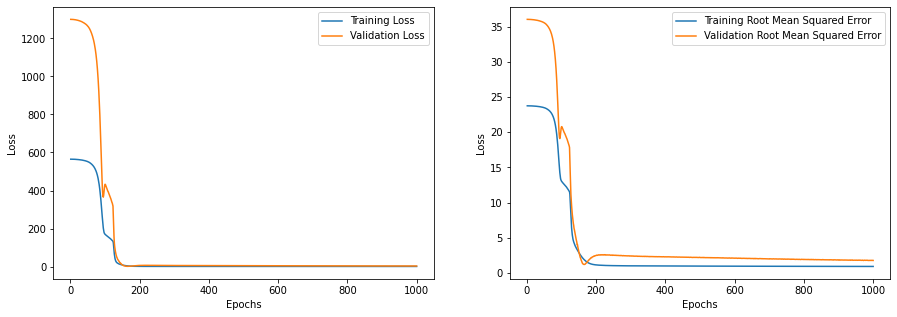

In [139]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

# Predicting Close Stock Price of Safaricom

In [153]:
Safaricom_prediction = Safaricom_Model.predict(Safaricom_Test_X)
print(Safaricom_prediction.shape)
print(Safaricom_prediction)
print(Safaricom_prediction.reshape(-1))
print(Safaricom_Test_X.shape)
print(Safaricom_Test_X)

(31, 5)
[[30.04242  29.933083 30.009142 29.929224 29.906546]
 [30.094376 29.967276 30.049074 29.965342 29.917686]
 [30.455368 30.316174 30.40035  30.319794 30.281134]
 [30.938635 30.76714  30.873075 30.767561 30.74816 ]
 [31.364859 31.15509  31.269508 31.160873 31.122658]
 [31.622631 31.420843 31.535969 31.42292  31.434198]
 [31.573906 31.36327  31.475128 31.370323 31.352507]
 [32.308895 32.032406 32.15106  32.044487 32.02128 ]
 [32.471916 32.203148 32.318295 32.215084 32.22047 ]
 [32.572674 32.279068 32.396458 32.29405  32.27713 ]
 [33.45748  33.109398 33.23197  33.12639  33.145924]
 [33.777615 33.40223  33.522896 33.42229  33.44404 ]
 [34.34854  33.934174 34.056465 33.95539  33.99975 ]
 [35.91072  35.375854 35.494026 35.347923 35.44435 ]
 [35.132145 34.63063  34.747967 34.632748 34.65677 ]
 [35.199406 34.728157 34.83679  34.73572  34.80703 ]
 [35.85269  35.339325 35.440292 35.329933 35.434288]
 [37.40937  36.703995 36.801613 36.646065 36.702583]
 [37.911816 37.181355 37.272663 37.105

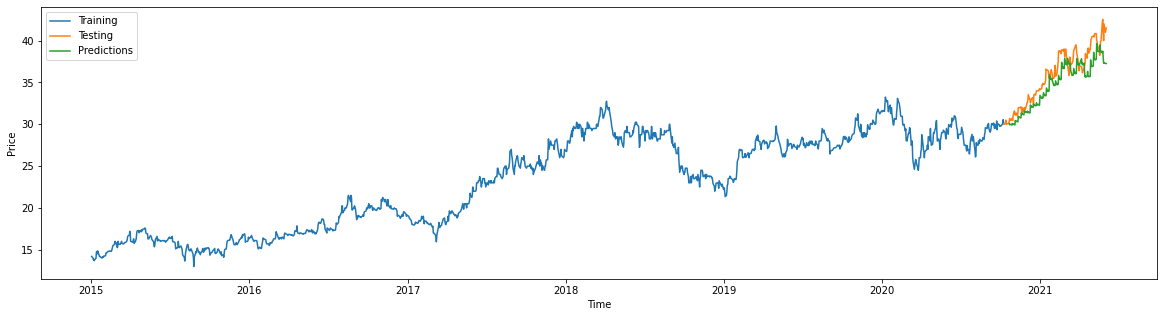

In [141]:
plt.figure(figsize=(20, 5))
plt.plot(safaricom['Date'][safaricom['Date'] < '2020-10-12'], safaricom['Close'][safaricom['Date'] < '2020-10-12'], label = 'Training')
plt.plot(safaricom['Date'][safaricom['Date'] >= '2020-10-09'], safaricom['Close'][safaricom['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(safaricom['Date'][safaricom['Date'] >= '2020-10-20'], Safaricom_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc = 'best')

In [142]:
rmse = math.sqrt(mean_squared_error(Safaricom_Test_Y.reshape(-1, 5), Safaricom_prediction))
mape = np.mean(np.abs(Safaricom_prediction - Safaricom_Test_Y.reshape(-1, 5))/np.abs(Safaricom_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 1.7872977321531314
MAPE: 0.039987651009595705


In [143]:
len(Safaricom_Test_Data)

161

In [145]:
x_input=Safaricom_Test_Data[156:].reshape(1,-1)
x_input.shape

(1, 5)

In [146]:
print(x_input)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(temp_input)

[[41.2 40.  42.  41.  41.5]]
[41.2, 40.0, 42.0, 41.0, 41.5]


In [147]:
print(temp_input)
print(len(temp_input))

[41.2, 40.0, 42.0, 41.0, 41.5]
5


In [148]:
x_new=np.array(temp_input[1:])
x_new

array([40. , 42. , 41. , 41.5])

In [166]:
# demonstrate prediction for next 30 days
from numpy import array


def forecast(model, history, n_input):

    #flatten data
    history = history.reshape(1,-1)
    data = array(history)
    # retrieve last observations for input data
    input_x = history[-n_input:, 0]
    print(input_x)
    # reshape into [1, n_input, 1]
    input_x = input_x.reshape((1, len(input_x), 1))
    # forecast the next week
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    #yhat = yhat[0]
    return yhat

forecast(model, Safaricom_Test_Data, 5)


[30.1]


array([[ 0.02203816, -0.00361892,  0.0202416 ,  0.04754276,  0.01839744]],
      dtype=float32)

# Equity

In [30]:
equity.head()

,Date,Open,High,Low,Close,VWAP,Adjusted,Volume
0,2015-01-02,51.00,51.0,50.0,51.00,50.50,50.50,215900.0
1,2015-01-05,50.50,51.0,49.5,50.00,49.75,49.75,326300.0
2,2015-01-06,49.75,50.0,49.0,49.75,49.50,49.50,319900.0
3,2015-01-07,49.00,50.0,49.0,49.25,49.50,49.50,1009600.0
4,2015-01-08,49.50,50.0,49.0,49.50,49.50,49.50,295200.0


In [31]:
equity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1534 non-null   datetime64[ns]
 1   Open      1534 non-null   float64       
 2   High      1534 non-null   float64       
 3   Low       1534 non-null   float64       
 4   Close     1534 non-null   float64       
 5   VWAP      1534 non-null   float64       
 6   Adjusted  1534 non-null   float64       
 7   Volume    1534 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 96.0 KB


In [32]:
Equity_Date = '2020-10-12'
Equity_Train_X, Equity_Train_Y, Equity_Test_X, Equity_Test_Y = Dataset(equity, Equity_Date)

# Modelling

In [33]:
Equity_Model = Model()

In [34]:
Equity_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [35]:
Equity_hist = Equity_Model.fit(Equity_Train_X, Equity_Train_Y, epochs = 1000, validation_data = (Equity_Test_X, Equity_Test_Y), callbacks=[callback])

Epoch 1/1000
9/9 [==============================] - 3s 74ms/step - loss: 1944.7764 - root_mean_squared_error: 44.0996 - val_loss: 1406.0428 - val_root_mean_squared_error: 37.4972
Epoch 2/1000
9/9 [==============================] - 0s 19ms/step - loss: 1944.7628 - root_mean_squared_error: 44.0995 - val_loss: 1406.0211 - val_root_mean_squared_error: 37.4969
Epoch 3/1000
9/9 [==============================] - 0s 19ms/step - loss: 1944.7168 - root_mean_squared_error: 44.0989 - val_loss: 1405.9778 - val_root_mean_squared_error: 37.4964
Epoch 4/1000
9/9 [==============================] - 0s 19ms/step - loss: 1944.6376 - root_mean_squared_error: 44.0980 - val_loss: 1405.9131 - val_root_mean_squared_error: 37.4955
Epoch 5/1000
9/9 [==============================] - 0s 19ms/step - loss: 1944.5229 - root_mean_squared_error: 44.0967 - val_loss: 1405.8269 - val_root_mean_squared_error: 37.4944
Epoch 6/1000
9/9 [==============================] - 0s 19ms/step - loss: 1944.3792 - root_mean_squared_er

Epoch 92/1000
9/9 [==============================] - 0s 17ms/step - loss: 652.1404 - root_mean_squared_error: 25.5370 - val_loss: 479.0008 - val_root_mean_squared_error: 21.8861
Epoch 93/1000
9/9 [==============================] - 0s 17ms/step - loss: 619.3937 - root_mean_squared_error: 24.8876 - val_loss: 451.2074 - val_root_mean_squared_error: 21.2416
Epoch 94/1000
9/9 [==============================] - 0s 18ms/step - loss: 592.7966 - root_mean_squared_error: 24.3474 - val_loss: 428.8711 - val_root_mean_squared_error: 20.7092
Epoch 95/1000
9/9 [==============================] - 0s 18ms/step - loss: 572.0264 - root_mean_squared_error: 23.9171 - val_loss: 410.5596 - val_root_mean_squared_error: 20.2623
Epoch 96/1000
9/9 [==============================] - 0s 18ms/step - loss: 555.2222 - root_mean_squared_error: 23.5632 - val_loss: 395.3234 - val_root_mean_squared_error: 19.8827
Epoch 97/1000
9/9 [==============================] - 0s 18ms/step - loss: 539.9405 - root_mean_squared_error: 

9/9 [==============================] - 0s 18ms/step - loss: 19.7628 - root_mean_squared_error: 4.4455 - val_loss: 1.6556 - val_root_mean_squared_error: 1.2867
Epoch 186/1000
9/9 [==============================] - 0s 18ms/step - loss: 19.7145 - root_mean_squared_error: 4.4401 - val_loss: 1.6521 - val_root_mean_squared_error: 1.2853
Epoch 187/1000
9/9 [==============================] - 0s 17ms/step - loss: 19.6932 - root_mean_squared_error: 4.4377 - val_loss: 1.6603 - val_root_mean_squared_error: 1.2885
Epoch 188/1000
9/9 [==============================] - 0s 17ms/step - loss: 19.7073 - root_mean_squared_error: 4.4393 - val_loss: 1.6552 - val_root_mean_squared_error: 1.2865
Epoch 189/1000
9/9 [==============================] - 0s 17ms/step - loss: 19.6754 - root_mean_squared_error: 4.4357 - val_loss: 1.6595 - val_root_mean_squared_error: 1.2882
Epoch 190/1000
9/9 [==============================] - 0s 18ms/step - loss: 19.6669 - root_mean_squared_error: 4.4347 - val_loss: 1.6589 - val_roo

9/9 [==============================] - 0s 18ms/step - loss: 18.9058 - root_mean_squared_error: 4.3481 - val_loss: 1.5304 - val_root_mean_squared_error: 1.2371
Epoch 280/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.9210 - root_mean_squared_error: 4.3498 - val_loss: 1.5179 - val_root_mean_squared_error: 1.2320
Epoch 281/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.8954 - root_mean_squared_error: 4.3469 - val_loss: 1.5285 - val_root_mean_squared_error: 1.2363
Epoch 282/1000
9/9 [==============================] - 0s 18ms/step - loss: 18.8857 - root_mean_squared_error: 4.3458 - val_loss: 1.5597 - val_root_mean_squared_error: 1.2489
Epoch 283/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.8869 - root_mean_squared_error: 4.3459 - val_loss: 1.5653 - val_root_mean_squared_error: 1.2511
Epoch 284/1000
9/9 [==============================] - 0s 18ms/step - loss: 18.8841 - root_mean_squared_error: 4.3456 - val_loss: 1.5494 - val_roo

9/9 [==============================] - 0s 18ms/step - loss: 18.5818 - root_mean_squared_error: 4.3107 - val_loss: 1.5019 - val_root_mean_squared_error: 1.2255
Epoch 374/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.5821 - root_mean_squared_error: 4.3107 - val_loss: 1.5068 - val_root_mean_squared_error: 1.2275
Epoch 375/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.5836 - root_mean_squared_error: 4.3109 - val_loss: 1.5006 - val_root_mean_squared_error: 1.2250
Epoch 376/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.5720 - root_mean_squared_error: 4.3095 - val_loss: 1.5077 - val_root_mean_squared_error: 1.2279
Epoch 377/1000
9/9 [==============================] - 0s 18ms/step - loss: 18.5714 - root_mean_squared_error: 4.3095 - val_loss: 1.5076 - val_root_mean_squared_error: 1.2278
Epoch 378/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.5727 - root_mean_squared_error: 4.3096 - val_loss: 1.5041 - val_roo

9/9 [==============================] - 0s 18ms/step - loss: 18.4004 - root_mean_squared_error: 4.2896 - val_loss: 1.4960 - val_root_mean_squared_error: 1.2231
Epoch 468/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.4067 - root_mean_squared_error: 4.2903 - val_loss: 1.5008 - val_root_mean_squared_error: 1.2251
Epoch 469/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.4055 - root_mean_squared_error: 4.2902 - val_loss: 1.4791 - val_root_mean_squared_error: 1.2162
Epoch 470/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.3943 - root_mean_squared_error: 4.2889 - val_loss: 1.4753 - val_root_mean_squared_error: 1.2146
Epoch 471/1000
9/9 [==============================] - 0s 18ms/step - loss: 18.3971 - root_mean_squared_error: 4.2892 - val_loss: 1.4732 - val_root_mean_squared_error: 1.2138
Epoch 472/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.3895 - root_mean_squared_error: 4.2883 - val_loss: 1.4743 - val_roo

Epoch 514/1000
9/9 [==============================] - 0s 19ms/step - loss: 18.3033 - root_mean_squared_error: 4.2782 - val_loss: 1.4802 - val_root_mean_squared_error: 1.2166
Epoch 515/1000
9/9 [==============================] - 0s 18ms/step - loss: 18.2962 - root_mean_squared_error: 4.2774 - val_loss: 1.4754 - val_root_mean_squared_error: 1.2147
Epoch 516/1000
9/9 [==============================] - 0s 18ms/step - loss: 18.2963 - root_mean_squared_error: 4.2774 - val_loss: 1.4726 - val_root_mean_squared_error: 1.2135
Epoch 517/1000
9/9 [==============================] - 0s 18ms/step - loss: 18.3044 - root_mean_squared_error: 4.2784 - val_loss: 1.4892 - val_root_mean_squared_error: 1.2203
Epoch 518/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.3065 - root_mean_squared_error: 4.2786 - val_loss: 1.4974 - val_root_mean_squared_error: 1.2237
Epoch 519/1000
9/9 [==============================] - 0s 17ms/step - loss: 18.2887 - root_mean_squared_error: 4.2765 - val_loss: 1

9/9 [==============================] - 0s 19ms/step - loss: 18.1970 - root_mean_squared_error: 4.2658 - val_loss: 1.4426 - val_root_mean_squared_error: 1.2011
Epoch 562/1000
9/9 [==============================] - 0s 19ms/step - loss: 18.1982 - root_mean_squared_error: 4.2659 - val_loss: 1.4428 - val_root_mean_squared_error: 1.2012
Epoch 563/1000
9/9 [==============================] - 0s 19ms/step - loss: 18.1989 - root_mean_squared_error: 4.2660 - val_loss: 1.4521 - val_root_mean_squared_error: 1.2050
Epoch 564/1000
9/9 [==============================] - 0s 18ms/step - loss: 18.1929 - root_mean_squared_error: 4.2653 - val_loss: 1.4602 - val_root_mean_squared_error: 1.2084
Epoch 565/1000
9/9 [==============================] - 0s 18ms/step - loss: 18.1880 - root_mean_squared_error: 4.2647 - val_loss: 1.4624 - val_root_mean_squared_error: 1.2093
Epoch 566/1000
9/9 [==============================] - 0s 18ms/step - loss: 18.1874 - root_mean_squared_error: 4.2647 - val_loss: 1.4653 - val_roo

Epoch 608/1000
9/9 [==============================] - 0s 23ms/step - loss: 18.0923 - root_mean_squared_error: 4.2535 - val_loss: 1.4399 - val_root_mean_squared_error: 1.1999
Epoch 609/1000
9/9 [==============================] - 0s 23ms/step - loss: 18.0953 - root_mean_squared_error: 4.2539 - val_loss: 1.4482 - val_root_mean_squared_error: 1.2034
Epoch 610/1000
9/9 [==============================] - 0s 20ms/step - loss: 18.0977 - root_mean_squared_error: 4.2541 - val_loss: 1.4449 - val_root_mean_squared_error: 1.2020
Epoch 611/1000
9/9 [==============================] - 0s 19ms/step - loss: 18.0794 - root_mean_squared_error: 4.2520 - val_loss: 1.4533 - val_root_mean_squared_error: 1.2055
Epoch 612/1000
9/9 [==============================] - 0s 19ms/step - loss: 18.0895 - root_mean_squared_error: 4.2532 - val_loss: 1.4473 - val_root_mean_squared_error: 1.2031
Epoch 613/1000
9/9 [==============================] - 0s 20ms/step - loss: 18.0784 - root_mean_squared_error: 4.2519 - val_loss: 1

Epoch 655/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.9669 - root_mean_squared_error: 4.2387 - val_loss: 1.4291 - val_root_mean_squared_error: 1.1954
Epoch 656/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.9671 - root_mean_squared_error: 4.2388 - val_loss: 1.4263 - val_root_mean_squared_error: 1.1943
Epoch 657/1000
9/9 [==============================] - 0s 17ms/step - loss: 17.9599 - root_mean_squared_error: 4.2379 - val_loss: 1.4264 - val_root_mean_squared_error: 1.1943
Epoch 658/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.9714 - root_mean_squared_error: 4.2393 - val_loss: 1.4404 - val_root_mean_squared_error: 1.2002
Epoch 659/1000
9/9 [==============================] - 0s 17ms/step - loss: 17.9555 - root_mean_squared_error: 4.2374 - val_loss: 1.4307 - val_root_mean_squared_error: 1.1961
Epoch 660/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.9582 - root_mean_squared_error: 4.2377 - val_loss: 1

9/9 [==============================] - 0s 19ms/step - loss: 17.8555 - root_mean_squared_error: 4.2256 - val_loss: 1.3959 - val_root_mean_squared_error: 1.1815
Epoch 703/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.8522 - root_mean_squared_error: 4.2252 - val_loss: 1.3974 - val_root_mean_squared_error: 1.1821
Epoch 704/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.8389 - root_mean_squared_error: 4.2236 - val_loss: 1.4096 - val_root_mean_squared_error: 1.1873
Epoch 705/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.8362 - root_mean_squared_error: 4.2233 - val_loss: 1.4261 - val_root_mean_squared_error: 1.1942
Epoch 706/1000
9/9 [==============================] - 0s 20ms/step - loss: 17.8467 - root_mean_squared_error: 4.2245 - val_loss: 1.4381 - val_root_mean_squared_error: 1.1992
Epoch 707/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.8397 - root_mean_squared_error: 4.2237 - val_loss: 1.4334 - val_roo

9/9 [==============================] - 0s 19ms/step - loss: 17.6435 - root_mean_squared_error: 4.2004 - val_loss: 1.4131 - val_root_mean_squared_error: 1.1887
Epoch 797/1000
9/9 [==============================] - 0s 17ms/step - loss: 17.6236 - root_mean_squared_error: 4.1980 - val_loss: 1.3866 - val_root_mean_squared_error: 1.1775
Epoch 798/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.6250 - root_mean_squared_error: 4.1982 - val_loss: 1.3782 - val_root_mean_squared_error: 1.1740
Epoch 799/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.6388 - root_mean_squared_error: 4.1999 - val_loss: 1.3724 - val_root_mean_squared_error: 1.1715
Epoch 800/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.6390 - root_mean_squared_error: 4.1999 - val_loss: 1.4006 - val_root_mean_squared_error: 1.1835
Epoch 801/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.6292 - root_mean_squared_error: 4.1987 - val_loss: 1.4105 - val_roo

9/9 [==============================] - 0s 19ms/step - loss: 17.4203 - root_mean_squared_error: 4.1738 - val_loss: 1.3719 - val_root_mean_squared_error: 1.1713
Epoch 891/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.4177 - root_mean_squared_error: 4.1735 - val_loss: 1.3750 - val_root_mean_squared_error: 1.1726
Epoch 892/1000
9/9 [==============================] - 0s 19ms/step - loss: 17.4163 - root_mean_squared_error: 4.1733 - val_loss: 1.3517 - val_root_mean_squared_error: 1.1626
Epoch 893/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.4097 - root_mean_squared_error: 4.1725 - val_loss: 1.3632 - val_root_mean_squared_error: 1.1676
Epoch 894/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.4047 - root_mean_squared_error: 4.1719 - val_loss: 1.3700 - val_root_mean_squared_error: 1.1705
Epoch 895/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.3992 - root_mean_squared_error: 4.1712 - val_loss: 1.3717 - val_roo

9/9 [==============================] - 0s 20ms/step - loss: 17.1961 - root_mean_squared_error: 4.1468 - val_loss: 1.3544 - val_root_mean_squared_error: 1.1638
Epoch 985/1000
9/9 [==============================] - 0s 20ms/step - loss: 17.2004 - root_mean_squared_error: 4.1473 - val_loss: 1.3531 - val_root_mean_squared_error: 1.1632
Epoch 986/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.1927 - root_mean_squared_error: 4.1464 - val_loss: 1.3509 - val_root_mean_squared_error: 1.1623
Epoch 987/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.2091 - root_mean_squared_error: 4.1484 - val_loss: 1.3371 - val_root_mean_squared_error: 1.1563
Epoch 988/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.1970 - root_mean_squared_error: 4.1469 - val_loss: 1.3583 - val_root_mean_squared_error: 1.1655
Epoch 989/1000
9/9 [==============================] - 0s 18ms/step - loss: 17.1871 - root_mean_squared_error: 4.1457 - val_loss: 1.3667 - val_roo

In [36]:
history_dict = Equity_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

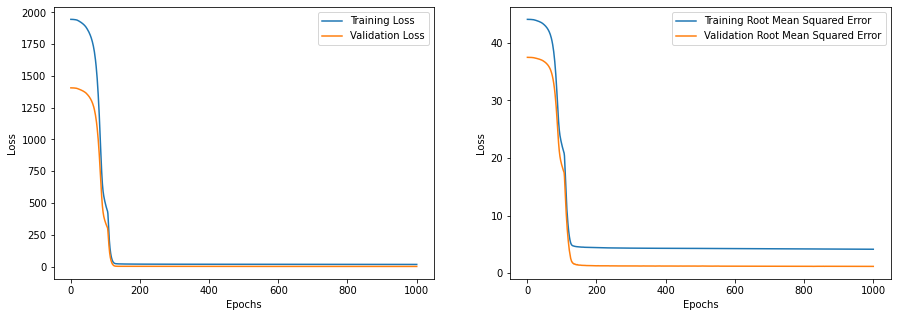

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

# Predicting Close Stock Price of Equity

In [38]:
Equity_prediction = Equity_Model.predict(Equity_Test_X)
print(Equity_prediction.shape)

(31, 5)


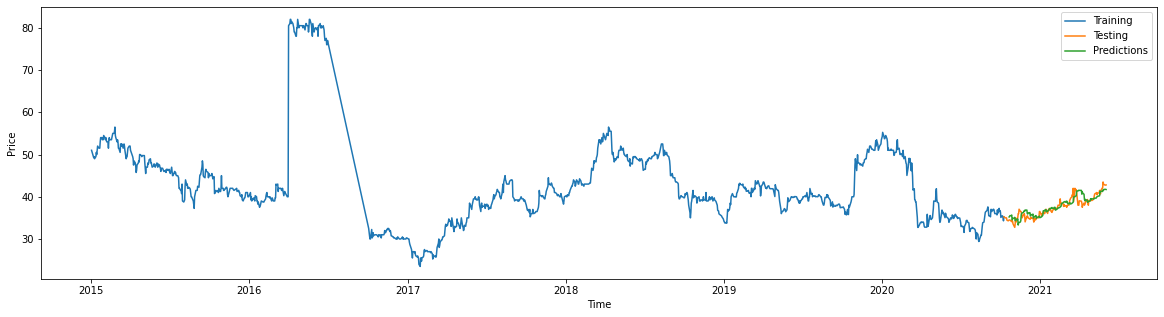

In [39]:
plt.figure(figsize=(20, 5))
plt.plot(equity['Date'][equity['Date'] < '2020-10-12'], equity['Close'][equity['Date'] < '2020-10-12'], label = 'Training')
plt.plot(equity['Date'][equity['Date'] >= '2020-10-09'], equity['Close'][equity['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(equity['Date'][equity['Date'] >= '2020-10-20'], Equity_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc = 'best')

In [40]:
rmse = math.sqrt(mean_squared_error(Equity_Test_Y.reshape(-1, 5), Equity_prediction))
mape = np.mean(np.abs(Equity_prediction - Equity_Test_Y.reshape(-1, 5))/np.abs(Equity_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 1.163358132944456
MAPE: 0.023603583757469786


# EABL

In [41]:
EABL.head()

,Date,Open,High,Low,Close,VWAP,Adjusted,Volume
0,2015-01-02,302.0,302.0,302.0,302.0,302.0,302.0,804000.0
1,2015-01-05,303.0,305.0,303.0,303.0,303.0,303.0,19500.0
2,2015-01-06,303.0,308.0,303.0,307.0,307.0,307.0,264100.0
3,2015-01-07,304.0,306.0,304.0,306.0,305.0,305.0,126800.0
4,2015-01-08,305.0,310.0,305.0,310.0,308.0,308.0,58900.0


In [42]:
EABL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1598 non-null   datetime64[ns]
 1   Open      1598 non-null   float64       
 2   High      1598 non-null   float64       
 3   Low       1598 non-null   float64       
 4   Close     1598 non-null   float64       
 5   VWAP      1598 non-null   float64       
 6   Adjusted  1598 non-null   float64       
 7   Volume    1593 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 100.0 KB


In [43]:
EABL_Date = '2020-10-12'
EABL_Train_X, EABL_Train_Y, EABL_Test_X, EABL_Test_Y = Dataset(EABL, EABL_Date)

# Modelling

In [44]:
EABL_Model=Model()

In [45]:
EABL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [46]:
EABL_hist = EABL_Model.fit(EABL_Train_X, EABL_Train_Y, epochs = 1000, validation_data = (EABL_Test_X, EABL_Test_Y), callbacks=[callback])

Epoch 1/1000
9/9 [==============================] - 3s 58ms/step - loss: 57015.2031 - root_mean_squared_error: 238.7786 - val_loss: 26092.4297 - val_root_mean_squared_error: 161.5315
Epoch 2/1000
9/9 [==============================] - 0s 19ms/step - loss: 57013.9023 - root_mean_squared_error: 238.7758 - val_loss: 26091.3535 - val_root_mean_squared_error: 161.5282
Epoch 3/1000
9/9 [==============================] - 0s 19ms/step - loss: 57009.5547 - root_mean_squared_error: 238.7668 - val_loss: 26089.1934 - val_root_mean_squared_error: 161.5215
Epoch 4/1000
9/9 [==============================] - 0s 19ms/step - loss: 57002.3047 - root_mean_squared_error: 238.7516 - val_loss: 26085.9629 - val_root_mean_squared_error: 161.5115
Epoch 5/1000
9/9 [==============================] - 0s 20ms/step - loss: 56992.0078 - root_mean_squared_error: 238.7300 - val_loss: 26081.6426 - val_root_mean_squared_error: 161.4981
Epoch 6/1000
9/9 [==============================] - 0s 20ms/step - loss: 56979.0156 -

9/9 [==============================] - 0s 18ms/step - loss: 20442.1270 - root_mean_squared_error: 142.9760 - val_loss: 9569.2129 - val_root_mean_squared_error: 97.8223
Epoch 90/1000
9/9 [==============================] - 0s 18ms/step - loss: 19110.2578 - root_mean_squared_error: 138.2399 - val_loss: 8944.6621 - val_root_mean_squared_error: 94.5762
Epoch 91/1000
9/9 [==============================] - 0s 18ms/step - loss: 18067.8574 - root_mean_squared_error: 134.4167 - val_loss: 8475.9951 - val_root_mean_squared_error: 92.0652
Epoch 92/1000
9/9 [==============================] - 0s 18ms/step - loss: 17387.1582 - root_mean_squared_error: 131.8604 - val_loss: 8125.2300 - val_root_mean_squared_error: 90.1401
Epoch 93/1000
9/9 [==============================] - 0s 18ms/step - loss: 16895.2383 - root_mean_squared_error: 129.9817 - val_loss: 7873.0586 - val_root_mean_squared_error: 88.7303
Epoch 94/1000
9/9 [==============================] - 0s 18ms/step - loss: 16561.6758 - root_mean_squared

Epoch 181/1000
9/9 [==============================] - 0s 18ms/step - loss: 60.1623 - root_mean_squared_error: 7.7564 - val_loss: 28.5485 - val_root_mean_squared_error: 5.3431
Epoch 182/1000
9/9 [==============================] - 0s 18ms/step - loss: 59.9387 - root_mean_squared_error: 7.7420 - val_loss: 28.4679 - val_root_mean_squared_error: 5.3355
Epoch 183/1000
9/9 [==============================] - 0s 18ms/step - loss: 60.0113 - root_mean_squared_error: 7.7467 - val_loss: 28.6500 - val_root_mean_squared_error: 5.3526
Epoch 184/1000
9/9 [==============================] - 0s 18ms/step - loss: 59.7424 - root_mean_squared_error: 7.7293 - val_loss: 28.3984 - val_root_mean_squared_error: 5.3290
Epoch 185/1000
9/9 [==============================] - 0s 18ms/step - loss: 59.6805 - root_mean_squared_error: 7.7253 - val_loss: 28.3230 - val_root_mean_squared_error: 5.3219
Epoch 186/1000
9/9 [==============================] - 0s 18ms/step - loss: 60.0576 - root_mean_squared_error: 7.7497 - val_lo

Epoch 228/1000
9/9 [==============================] - 0s 18ms/step - loss: 57.1780 - root_mean_squared_error: 7.5616 - val_loss: 25.6949 - val_root_mean_squared_error: 5.0690
Epoch 229/1000
9/9 [==============================] - 0s 18ms/step - loss: 57.1234 - root_mean_squared_error: 7.5580 - val_loss: 25.7181 - val_root_mean_squared_error: 5.0713
Epoch 230/1000
9/9 [==============================] - 0s 18ms/step - loss: 57.1070 - root_mean_squared_error: 7.5569 - val_loss: 25.6186 - val_root_mean_squared_error: 5.0615
Epoch 231/1000
9/9 [==============================] - 0s 18ms/step - loss: 56.8058 - root_mean_squared_error: 7.5370 - val_loss: 25.8636 - val_root_mean_squared_error: 5.0856
Epoch 232/1000
9/9 [==============================] - 0s 18ms/step - loss: 56.9376 - root_mean_squared_error: 7.5457 - val_loss: 25.6205 - val_root_mean_squared_error: 5.0617
Epoch 233/1000
9/9 [==============================] - 0s 18ms/step - loss: 56.8767 - root_mean_squared_error: 7.5417 - val_lo

Epoch 275/1000
9/9 [==============================] - 0s 19ms/step - loss: 55.6401 - root_mean_squared_error: 7.4592 - val_loss: 24.4574 - val_root_mean_squared_error: 4.9454
Epoch 276/1000
9/9 [==============================] - 0s 19ms/step - loss: 55.5269 - root_mean_squared_error: 7.4516 - val_loss: 24.5351 - val_root_mean_squared_error: 4.9533
Epoch 277/1000
9/9 [==============================] - 0s 19ms/step - loss: 56.0116 - root_mean_squared_error: 7.4841 - val_loss: 24.6992 - val_root_mean_squared_error: 4.9698
Epoch 278/1000
9/9 [==============================] - 0s 18ms/step - loss: 55.3764 - root_mean_squared_error: 7.4415 - val_loss: 24.0063 - val_root_mean_squared_error: 4.8996
Epoch 279/1000
9/9 [==============================] - 0s 18ms/step - loss: 55.6881 - root_mean_squared_error: 7.4624 - val_loss: 24.4547 - val_root_mean_squared_error: 4.9452
Epoch 280/1000
9/9 [==============================] - 0s 19ms/step - loss: 55.5230 - root_mean_squared_error: 7.4514 - val_lo

Epoch 322/1000
9/9 [==============================] - 0s 18ms/step - loss: 54.7408 - root_mean_squared_error: 7.3987 - val_loss: 23.6272 - val_root_mean_squared_error: 4.8608
Epoch 323/1000
9/9 [==============================] - 0s 18ms/step - loss: 54.7245 - root_mean_squared_error: 7.3976 - val_loss: 23.4921 - val_root_mean_squared_error: 4.8469
Epoch 324/1000
9/9 [==============================] - 0s 18ms/step - loss: 54.6924 - root_mean_squared_error: 7.3954 - val_loss: 23.5175 - val_root_mean_squared_error: 4.8495
Epoch 325/1000
9/9 [==============================] - 0s 18ms/step - loss: 54.6824 - root_mean_squared_error: 7.3948 - val_loss: 23.7714 - val_root_mean_squared_error: 4.8756
Epoch 326/1000
9/9 [==============================] - 0s 18ms/step - loss: 54.6561 - root_mean_squared_error: 7.3930 - val_loss: 23.5368 - val_root_mean_squared_error: 4.8515
Epoch 327/1000
9/9 [==============================] - 0s 18ms/step - loss: 55.2022 - root_mean_squared_error: 7.4298 - val_lo

Epoch 369/1000
9/9 [==============================] - 0s 19ms/step - loss: 54.4528 - root_mean_squared_error: 7.3792 - val_loss: 23.0986 - val_root_mean_squared_error: 4.8061
Epoch 370/1000
9/9 [==============================] - 0s 19ms/step - loss: 54.1925 - root_mean_squared_error: 7.3616 - val_loss: 23.2532 - val_root_mean_squared_error: 4.8222
Epoch 371/1000
9/9 [==============================] - 0s 18ms/step - loss: 54.2102 - root_mean_squared_error: 7.3628 - val_loss: 23.6100 - val_root_mean_squared_error: 4.8590
Epoch 372/1000
9/9 [==============================] - 0s 18ms/step - loss: 54.2601 - root_mean_squared_error: 7.3661 - val_loss: 23.4068 - val_root_mean_squared_error: 4.8381
Epoch 373/1000
9/9 [==============================] - 0s 18ms/step - loss: 54.2337 - root_mean_squared_error: 7.3644 - val_loss: 23.3263 - val_root_mean_squared_error: 4.8297
Epoch 374/1000
9/9 [==============================] - 0s 18ms/step - loss: 54.3738 - root_mean_squared_error: 7.3739 - val_lo

Epoch 416/1000
9/9 [==============================] - 0s 19ms/step - loss: 53.9016 - root_mean_squared_error: 7.3418 - val_loss: 23.1745 - val_root_mean_squared_error: 4.8140
Epoch 417/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.9565 - root_mean_squared_error: 7.3455 - val_loss: 22.8288 - val_root_mean_squared_error: 4.7780
Epoch 418/1000
9/9 [==============================] - 0s 18ms/step - loss: 54.0226 - root_mean_squared_error: 7.3500 - val_loss: 23.1205 - val_root_mean_squared_error: 4.8084
Epoch 419/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.9558 - root_mean_squared_error: 7.3455 - val_loss: 23.0752 - val_root_mean_squared_error: 4.8037
Epoch 420/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.9301 - root_mean_squared_error: 7.3437 - val_loss: 22.7074 - val_root_mean_squared_error: 4.7652
Epoch 421/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.8956 - root_mean_squared_error: 7.3414 - val_lo

Epoch 463/1000
9/9 [==============================] - 0s 20ms/step - loss: 53.7014 - root_mean_squared_error: 7.3281 - val_loss: 22.6703 - val_root_mean_squared_error: 4.7613
Epoch 464/1000
9/9 [==============================] - 0s 19ms/step - loss: 53.6738 - root_mean_squared_error: 7.3262 - val_loss: 22.6552 - val_root_mean_squared_error: 4.7597
Epoch 465/1000
9/9 [==============================] - 0s 19ms/step - loss: 53.6959 - root_mean_squared_error: 7.3278 - val_loss: 22.8130 - val_root_mean_squared_error: 4.7763
Epoch 466/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.6053 - root_mean_squared_error: 7.3216 - val_loss: 22.7288 - val_root_mean_squared_error: 4.7675
Epoch 467/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.7563 - root_mean_squared_error: 7.3319 - val_loss: 22.5166 - val_root_mean_squared_error: 4.7452
Epoch 468/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.6114 - root_mean_squared_error: 7.3220 - val_lo

Epoch 510/1000
9/9 [==============================] - 0s 19ms/step - loss: 53.5737 - root_mean_squared_error: 7.3194 - val_loss: 22.2869 - val_root_mean_squared_error: 4.7209
Epoch 511/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.4044 - root_mean_squared_error: 7.3078 - val_loss: 22.7219 - val_root_mean_squared_error: 4.7667
Epoch 512/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.3687 - root_mean_squared_error: 7.3054 - val_loss: 22.5394 - val_root_mean_squared_error: 4.7476
Epoch 513/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.4015 - root_mean_squared_error: 7.3076 - val_loss: 22.5148 - val_root_mean_squared_error: 4.7450
Epoch 514/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.6400 - root_mean_squared_error: 7.3239 - val_loss: 22.2349 - val_root_mean_squared_error: 4.7154
Epoch 515/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.4408 - root_mean_squared_error: 7.3103 - val_lo

Epoch 557/1000
9/9 [==============================] - 0s 20ms/step - loss: 53.4548 - root_mean_squared_error: 7.3113 - val_loss: 21.9545 - val_root_mean_squared_error: 4.6856
Epoch 558/1000
9/9 [==============================] - 0s 19ms/step - loss: 53.0746 - root_mean_squared_error: 7.2852 - val_loss: 22.5525 - val_root_mean_squared_error: 4.7490
Epoch 559/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.2198 - root_mean_squared_error: 7.2952 - val_loss: 22.7418 - val_root_mean_squared_error: 4.7688
Epoch 560/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.2357 - root_mean_squared_error: 7.2963 - val_loss: 22.0450 - val_root_mean_squared_error: 4.6952
Epoch 561/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.1724 - root_mean_squared_error: 7.2919 - val_loss: 22.3268 - val_root_mean_squared_error: 4.7251
Epoch 562/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.1860 - root_mean_squared_error: 7.2929 - val_lo

Epoch 604/1000
9/9 [==============================] - 0s 18ms/step - loss: 52.8598 - root_mean_squared_error: 7.2705 - val_loss: 22.0971 - val_root_mean_squared_error: 4.7008
Epoch 605/1000
9/9 [==============================] - 0s 18ms/step - loss: 52.9073 - root_mean_squared_error: 7.2737 - val_loss: 22.1633 - val_root_mean_squared_error: 4.7078
Epoch 606/1000
9/9 [==============================] - 0s 18ms/step - loss: 52.9625 - root_mean_squared_error: 7.2775 - val_loss: 22.3233 - val_root_mean_squared_error: 4.7248
Epoch 607/1000
9/9 [==============================] - 0s 18ms/step - loss: 52.8671 - root_mean_squared_error: 7.2710 - val_loss: 22.0415 - val_root_mean_squared_error: 4.6948
Epoch 608/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.0424 - root_mean_squared_error: 7.2830 - val_loss: 21.8309 - val_root_mean_squared_error: 4.6724
Epoch 609/1000
9/9 [==============================] - 0s 18ms/step - loss: 53.0148 - root_mean_squared_error: 7.2811 - val_lo

Epoch 651/1000
9/9 [==============================] - 0s 20ms/step - loss: 52.6387 - root_mean_squared_error: 7.2553 - val_loss: 22.0789 - val_root_mean_squared_error: 4.6988
Epoch 652/1000
9/9 [==============================] - 0s 20ms/step - loss: 52.7584 - root_mean_squared_error: 7.2635 - val_loss: 22.0409 - val_root_mean_squared_error: 4.6948
Epoch 653/1000
9/9 [==============================] - 0s 19ms/step - loss: 52.8098 - root_mean_squared_error: 7.2670 - val_loss: 22.1804 - val_root_mean_squared_error: 4.7096
Epoch 654/1000
9/9 [==============================] - 0s 20ms/step - loss: 52.6762 - root_mean_squared_error: 7.2578 - val_loss: 22.1195 - val_root_mean_squared_error: 4.7031
Epoch 655/1000
9/9 [==============================] - 0s 19ms/step - loss: 52.7787 - root_mean_squared_error: 7.2649 - val_loss: 21.6230 - val_root_mean_squared_error: 4.6501
Epoch 656/1000
9/9 [==============================] - 0s 18ms/step - loss: 52.7294 - root_mean_squared_error: 7.2615 - val_lo

Epoch 698/1000
9/9 [==============================] - 0s 18ms/step - loss: 52.4136 - root_mean_squared_error: 7.2397 - val_loss: 21.7633 - val_root_mean_squared_error: 4.6651
Epoch 699/1000
9/9 [==============================] - 0s 18ms/step - loss: 52.4771 - root_mean_squared_error: 7.2441 - val_loss: 21.4694 - val_root_mean_squared_error: 4.6335
Epoch 700/1000
9/9 [==============================] - 0s 18ms/step - loss: 52.4011 - root_mean_squared_error: 7.2389 - val_loss: 21.9115 - val_root_mean_squared_error: 4.6810
Epoch 701/1000
9/9 [==============================] - 0s 18ms/step - loss: 52.4082 - root_mean_squared_error: 7.2394 - val_loss: 21.8061 - val_root_mean_squared_error: 4.6697
Epoch 702/1000
9/9 [==============================] - 0s 18ms/step - loss: 52.4920 - root_mean_squared_error: 7.2451 - val_loss: 21.2912 - val_root_mean_squared_error: 4.6142
Epoch 703/1000
9/9 [==============================] - 0s 18ms/step - loss: 52.4584 - root_mean_squared_error: 7.2428 - val_lo

Epoch 745/1000
9/9 [==============================] - 0s 20ms/step - loss: 52.1228 - root_mean_squared_error: 7.2196 - val_loss: 21.2444 - val_root_mean_squared_error: 4.6092
Epoch 746/1000
9/9 [==============================] - 0s 19ms/step - loss: 52.2733 - root_mean_squared_error: 7.2300 - val_loss: 21.5408 - val_root_mean_squared_error: 4.6412
Epoch 747/1000
9/9 [==============================] - 0s 20ms/step - loss: 52.0580 - root_mean_squared_error: 7.2151 - val_loss: 21.0309 - val_root_mean_squared_error: 4.5859
Epoch 748/1000
9/9 [==============================] - 0s 21ms/step - loss: 52.0716 - root_mean_squared_error: 7.2161 - val_loss: 21.1439 - val_root_mean_squared_error: 4.5983
Epoch 749/1000
9/9 [==============================] - 0s 19ms/step - loss: 52.0269 - root_mean_squared_error: 7.2130 - val_loss: 21.5351 - val_root_mean_squared_error: 4.6406
Epoch 750/1000
9/9 [==============================] - 0s 19ms/step - loss: 52.0890 - root_mean_squared_error: 7.2173 - val_lo

Epoch 838/1000
9/9 [==============================] - 0s 19ms/step - loss: 51.5154 - root_mean_squared_error: 7.1774 - val_loss: 21.0662 - val_root_mean_squared_error: 4.5898
Epoch 839/1000
9/9 [==============================] - 0s 20ms/step - loss: 51.5778 - root_mean_squared_error: 7.1818 - val_loss: 20.8771 - val_root_mean_squared_error: 4.5692
Epoch 840/1000
9/9 [==============================] - 0s 19ms/step - loss: 51.5281 - root_mean_squared_error: 7.1783 - val_loss: 21.1557 - val_root_mean_squared_error: 4.5995
Epoch 841/1000
9/9 [==============================] - 0s 18ms/step - loss: 51.6192 - root_mean_squared_error: 7.1847 - val_loss: 21.3444 - val_root_mean_squared_error: 4.6200
Epoch 842/1000
9/9 [==============================] - 0s 18ms/step - loss: 51.4443 - root_mean_squared_error: 7.1725 - val_loss: 20.8357 - val_root_mean_squared_error: 4.5646
Epoch 843/1000
9/9 [==============================] - 0s 17ms/step - loss: 51.6893 - root_mean_squared_error: 7.1895 - val_lo

9/9 [==============================] - 0s 18ms/step - loss: 51.0754 - root_mean_squared_error: 7.1467 - val_loss: 20.7585 - val_root_mean_squared_error: 4.5561
Epoch 931/1000
9/9 [==============================] - 0s 19ms/step - loss: 51.1564 - root_mean_squared_error: 7.1524 - val_loss: 20.4323 - val_root_mean_squared_error: 4.5202
Epoch 932/1000
9/9 [==============================] - 0s 20ms/step - loss: 51.0657 - root_mean_squared_error: 7.1460 - val_loss: 20.5165 - val_root_mean_squared_error: 4.5295
Epoch 933/1000
9/9 [==============================] - 0s 18ms/step - loss: 51.2732 - root_mean_squared_error: 7.1605 - val_loss: 21.1320 - val_root_mean_squared_error: 4.5970
Epoch 934/1000
9/9 [==============================] - 0s 18ms/step - loss: 51.0561 - root_mean_squared_error: 7.1454 - val_loss: 20.3546 - val_root_mean_squared_error: 4.5116
Epoch 935/1000
9/9 [==============================] - 0s 18ms/step - loss: 51.0527 - root_mean_squared_error: 7.1451 - val_loss: 20.4760 - v

Epoch 977/1000
9/9 [==============================] - 0s 17ms/step - loss: 50.8452 - root_mean_squared_error: 7.1306 - val_loss: 20.7106 - val_root_mean_squared_error: 4.5509
Epoch 978/1000
9/9 [==============================] - 0s 18ms/step - loss: 50.8299 - root_mean_squared_error: 7.1295 - val_loss: 20.6327 - val_root_mean_squared_error: 4.5423
Epoch 979/1000
9/9 [==============================] - 0s 18ms/step - loss: 50.8895 - root_mean_squared_error: 7.1337 - val_loss: 20.2256 - val_root_mean_squared_error: 4.4973
Epoch 980/1000
9/9 [==============================] - 0s 18ms/step - loss: 50.8641 - root_mean_squared_error: 7.1319 - val_loss: 20.3147 - val_root_mean_squared_error: 4.5072
Epoch 981/1000
9/9 [==============================] - 0s 18ms/step - loss: 50.9741 - root_mean_squared_error: 7.1396 - val_loss: 20.8677 - val_root_mean_squared_error: 4.5681
Epoch 982/1000
9/9 [==============================] - 0s 18ms/step - loss: 50.9794 - root_mean_squared_error: 7.1400 - val_lo

In [47]:
history_dict = EABL_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

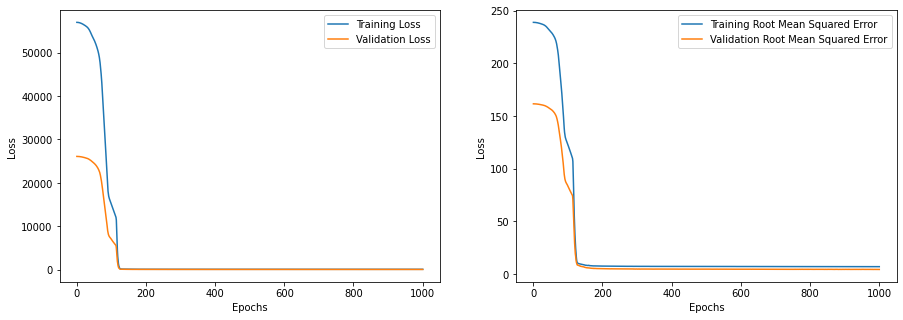

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

# Predicting Close Prices for EABL

In [49]:
EABL_prediction = EABL_Model.predict(EABL_Test_X)
print(EABL_prediction.shape)

(31, 5)


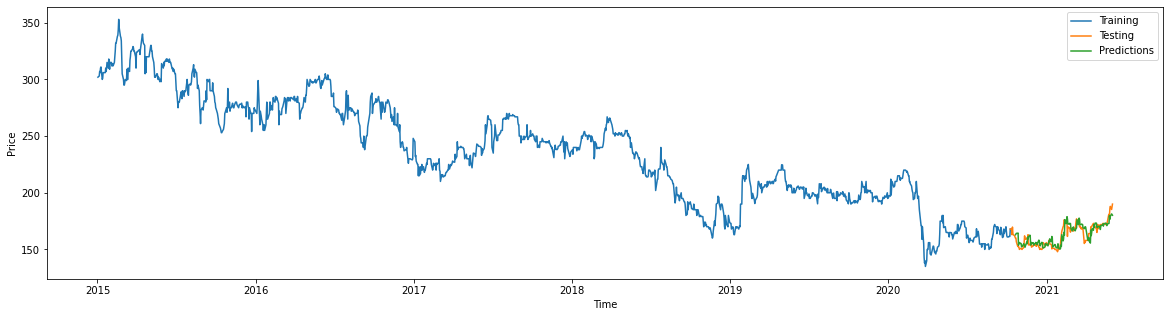

In [50]:
plt.figure(figsize=(20, 5))
plt.plot(EABL['Date'][EABL['Date'] < '2020-10-12'], EABL['Close'][EABL['Date'] < '2020-10-12'], label = 'Training')
plt.plot(EABL['Date'][EABL['Date'] >= '2020-10-09'], EABL['Close'][EABL['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(EABL['Date'][EABL['Date'] >= '2020-10-20'], EABL_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc = 'best')

In [51]:
rmse = math.sqrt(mean_squared_error(EABL_Test_Y.reshape(-1, 5), EABL_prediction))
mape = np.mean(np.abs(EABL_prediction - EABL_Test_Y.reshape(-1, 5))/np.abs(EABL_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 4.490213926905338
MAPE: 0.020673170654145645


# BAT

In [52]:
BAT.head()

,Date,Open,High,Low,Close,VWAP,Adjusted,Volume
0,2015-01-02,901.0,901.0,901.0,901.0,901.0,901.0,5000.0
1,2015-01-05,900.0,900.0,880.0,880.0,891.0,891.0,700.0
2,2015-01-06,900.0,900.0,881.0,881.0,898.0,898.0,2800.0
3,2015-01-07,900.0,901.0,880.0,901.0,900.0,900.0,53100.0
4,2015-01-08,901.0,901.0,901.0,901.0,901.0,901.0,100.0


In [53]:
BAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1598 non-null   datetime64[ns]
 1   Open      1598 non-null   float64       
 2   High      1598 non-null   float64       
 3   Low       1598 non-null   float64       
 4   Close     1598 non-null   float64       
 5   VWAP      1598 non-null   float64       
 6   Adjusted  1598 non-null   float64       
 7   Volume    1233 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 100.0 KB


In [54]:
BAT_Date = '2020-10-12'
BAT_Train_X, BAT_Train_Y, BAT_Test_X, BAT_Test_Y = Dataset(BAT, BAT_Date)

# Modelling

In [55]:
BAT_Model=Model()

In [56]:
BAT_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [57]:
BAT_Model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 200)            161600    
_________________________________________________________________
lstm_9 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_16 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_18 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 255       
Total params: 548,005
Trainable params: 548,005
Non-trainable params: 0
________________________________________________

In [58]:
BAT_hist = BAT_Model.fit(BAT_Train_X, BAT_Train_Y, epochs = 1000, validation_data = (BAT_Test_X, BAT_Test_Y), callbacks=[callback])

Epoch 1/1000
9/9 [==============================] - 3s 74ms/step - loss: 475257.6875 - root_mean_squared_error: 689.3893 - val_loss: 177249.7188 - val_root_mean_squared_error: 421.0104
Epoch 2/1000
9/9 [==============================] - 0s 19ms/step - loss: 475251.3438 - root_mean_squared_error: 689.3848 - val_loss: 177244.5938 - val_root_mean_squared_error: 421.0043
Epoch 3/1000
9/9 [==============================] - 0s 20ms/step - loss: 475230.3750 - root_mean_squared_error: 689.3696 - val_loss: 177234.2656 - val_root_mean_squared_error: 420.9920
Epoch 4/1000
9/9 [==============================] - 0s 19ms/step - loss: 475194.8125 - root_mean_squared_error: 689.3437 - val_loss: 177218.8750 - val_root_mean_squared_error: 420.9737
Epoch 5/1000
9/9 [==============================] - 0s 21ms/step - loss: 475144.6562 - root_mean_squared_error: 689.3074 - val_loss: 177198.3594 - val_root_mean_squared_error: 420.9493
Epoch 6/1000
9/9 [==============================] - 0s 21ms/step - loss: 47

9/9 [==============================] - 0s 18ms/step - loss: 294019.5938 - root_mean_squared_error: 542.2357 - val_loss: 109502.3047 - val_root_mean_squared_error: 330.9113
Epoch 90/1000
9/9 [==============================] - 0s 18ms/step - loss: 282616.7812 - root_mean_squared_error: 531.6171 - val_loss: 105123.4609 - val_root_mean_squared_error: 324.2275
Epoch 91/1000
9/9 [==============================] - 0s 18ms/step - loss: 271415.6875 - root_mean_squared_error: 520.9757 - val_loss: 100696.4609 - val_root_mean_squared_error: 317.3271
Epoch 92/1000
9/9 [==============================] - 0s 18ms/step - loss: 259391.8906 - root_mean_squared_error: 509.3053 - val_loss: 95839.2031 - val_root_mean_squared_error: 309.5791
Epoch 93/1000
9/9 [==============================] - 0s 18ms/step - loss: 243766.2031 - root_mean_squared_error: 493.7268 - val_loss: 90057.1641 - val_root_mean_squared_error: 300.0952
Epoch 94/1000
9/9 [==============================] - 0s 18ms/step - loss: 229171.0000 

Epoch 134/1000
9/9 [==============================] - 0s 18ms/step - loss: 732.6671 - root_mean_squared_error: 27.0678 - val_loss: 286.8262 - val_root_mean_squared_error: 16.9359
Epoch 135/1000
9/9 [==============================] - 0s 18ms/step - loss: 709.9544 - root_mean_squared_error: 26.6450 - val_loss: 279.8971 - val_root_mean_squared_error: 16.7301
Epoch 136/1000
9/9 [==============================] - 0s 18ms/step - loss: 694.2114 - root_mean_squared_error: 26.3479 - val_loss: 282.0790 - val_root_mean_squared_error: 16.7952
Epoch 137/1000
9/9 [==============================] - 0s 18ms/step - loss: 687.3663 - root_mean_squared_error: 26.2177 - val_loss: 279.7482 - val_root_mean_squared_error: 16.7257
Epoch 138/1000
9/9 [==============================] - 0s 18ms/step - loss: 682.2763 - root_mean_squared_error: 26.1204 - val_loss: 277.7210 - val_root_mean_squared_error: 16.6650
Epoch 139/1000
9/9 [==============================] - 0s 18ms/step - loss: 677.7122 - root_mean_squared_e

Epoch 180/1000
9/9 [==============================] - 0s 18ms/step - loss: 587.7851 - root_mean_squared_error: 24.2443 - val_loss: 244.4825 - val_root_mean_squared_error: 15.6359
Epoch 181/1000
9/9 [==============================] - 0s 18ms/step - loss: 587.4242 - root_mean_squared_error: 24.2368 - val_loss: 243.0298 - val_root_mean_squared_error: 15.5894
Epoch 182/1000
9/9 [==============================] - 0s 18ms/step - loss: 590.9084 - root_mean_squared_error: 24.3086 - val_loss: 243.9208 - val_root_mean_squared_error: 15.6180
Epoch 183/1000
9/9 [==============================] - 0s 18ms/step - loss: 591.2433 - root_mean_squared_error: 24.3155 - val_loss: 243.3460 - val_root_mean_squared_error: 15.5996
Epoch 184/1000
9/9 [==============================] - 0s 18ms/step - loss: 586.0427 - root_mean_squared_error: 24.2083 - val_loss: 243.6746 - val_root_mean_squared_error: 15.6101
Epoch 185/1000
9/9 [==============================] - 0s 18ms/step - loss: 583.3605 - root_mean_squared_e

Epoch 226/1000
9/9 [==============================] - 0s 18ms/step - loss: 553.4655 - root_mean_squared_error: 23.5258 - val_loss: 235.1107 - val_root_mean_squared_error: 15.3333
Epoch 227/1000
9/9 [==============================] - 0s 18ms/step - loss: 555.5021 - root_mean_squared_error: 23.5691 - val_loss: 234.4494 - val_root_mean_squared_error: 15.3117
Epoch 228/1000
9/9 [==============================] - 0s 18ms/step - loss: 554.9908 - root_mean_squared_error: 23.5582 - val_loss: 236.1630 - val_root_mean_squared_error: 15.3676
Epoch 229/1000
9/9 [==============================] - 0s 18ms/step - loss: 558.0639 - root_mean_squared_error: 23.6234 - val_loss: 234.3371 - val_root_mean_squared_error: 15.3081
Epoch 230/1000
9/9 [==============================] - 0s 18ms/step - loss: 551.8979 - root_mean_squared_error: 23.4925 - val_loss: 234.9384 - val_root_mean_squared_error: 15.3277
Epoch 231/1000
9/9 [==============================] - 0s 18ms/step - loss: 553.5124 - root_mean_squared_e

Epoch 272/1000
9/9 [==============================] - 0s 18ms/step - loss: 534.2085 - root_mean_squared_error: 23.1130 - val_loss: 232.0308 - val_root_mean_squared_error: 15.2326
Epoch 273/1000
9/9 [==============================] - 0s 18ms/step - loss: 531.1336 - root_mean_squared_error: 23.0463 - val_loss: 231.8935 - val_root_mean_squared_error: 15.2280
Epoch 274/1000
9/9 [==============================] - 0s 18ms/step - loss: 531.7267 - root_mean_squared_error: 23.0592 - val_loss: 233.1136 - val_root_mean_squared_error: 15.2681
Epoch 275/1000
9/9 [==============================] - 0s 18ms/step - loss: 531.5453 - root_mean_squared_error: 23.0553 - val_loss: 231.5785 - val_root_mean_squared_error: 15.2177
Epoch 276/1000
9/9 [==============================] - 0s 18ms/step - loss: 531.0401 - root_mean_squared_error: 23.0443 - val_loss: 231.8100 - val_root_mean_squared_error: 15.2253
Epoch 277/1000
9/9 [==============================] - 0s 18ms/step - loss: 531.8997 - root_mean_squared_e

Epoch 318/1000
9/9 [==============================] - 0s 19ms/step - loss: 520.2637 - root_mean_squared_error: 22.8093 - val_loss: 228.5952 - val_root_mean_squared_error: 15.1194
Epoch 319/1000
9/9 [==============================] - 0s 18ms/step - loss: 519.9511 - root_mean_squared_error: 22.8024 - val_loss: 228.9284 - val_root_mean_squared_error: 15.1304
Epoch 320/1000
9/9 [==============================] - 0s 18ms/step - loss: 519.6914 - root_mean_squared_error: 22.7967 - val_loss: 228.7541 - val_root_mean_squared_error: 15.1246
Epoch 321/1000
9/9 [==============================] - 0s 20ms/step - loss: 520.3263 - root_mean_squared_error: 22.8107 - val_loss: 228.2099 - val_root_mean_squared_error: 15.1066
Epoch 322/1000
9/9 [==============================] - 0s 18ms/step - loss: 519.0981 - root_mean_squared_error: 22.7837 - val_loss: 228.5670 - val_root_mean_squared_error: 15.1184
Epoch 323/1000
9/9 [==============================] - 0s 19ms/step - loss: 520.0541 - root_mean_squared_e

Epoch 364/1000
9/9 [==============================] - 0s 18ms/step - loss: 514.5471 - root_mean_squared_error: 22.6836 - val_loss: 227.9345 - val_root_mean_squared_error: 15.0975
Epoch 365/1000
9/9 [==============================] - 0s 19ms/step - loss: 514.1995 - root_mean_squared_error: 22.6760 - val_loss: 227.8885 - val_root_mean_squared_error: 15.0960
Epoch 366/1000
9/9 [==============================] - 0s 19ms/step - loss: 514.2229 - root_mean_squared_error: 22.6765 - val_loss: 227.6746 - val_root_mean_squared_error: 15.0889
Epoch 367/1000
9/9 [==============================] - 0s 18ms/step - loss: 514.2227 - root_mean_squared_error: 22.6765 - val_loss: 227.7240 - val_root_mean_squared_error: 15.0905
Epoch 368/1000
9/9 [==============================] - 0s 18ms/step - loss: 514.0430 - root_mean_squared_error: 22.6725 - val_loss: 227.6634 - val_root_mean_squared_error: 15.0885
Epoch 369/1000
9/9 [==============================] - 0s 18ms/step - loss: 514.0357 - root_mean_squared_e

Epoch 410/1000
9/9 [==============================] - 0s 18ms/step - loss: 511.6170 - root_mean_squared_error: 22.6190 - val_loss: 227.6650 - val_root_mean_squared_error: 15.0886
Epoch 411/1000
9/9 [==============================] - 0s 18ms/step - loss: 511.2127 - root_mean_squared_error: 22.6100 - val_loss: 227.4252 - val_root_mean_squared_error: 15.0806
Epoch 412/1000
9/9 [==============================] - 0s 18ms/step - loss: 511.2941 - root_mean_squared_error: 22.6118 - val_loss: 227.5267 - val_root_mean_squared_error: 15.0840
Epoch 413/1000
9/9 [==============================] - 0s 19ms/step - loss: 511.0791 - root_mean_squared_error: 22.6071 - val_loss: 227.7668 - val_root_mean_squared_error: 15.0919
Epoch 414/1000
9/9 [==============================] - 0s 19ms/step - loss: 510.9080 - root_mean_squared_error: 22.6033 - val_loss: 227.7668 - val_root_mean_squared_error: 15.0919
Epoch 415/1000
9/9 [==============================] - 0s 18ms/step - loss: 510.8985 - root_mean_squared_e

Epoch 501/1000
9/9 [==============================] - 0s 20ms/step - loss: 506.4591 - root_mean_squared_error: 22.5046 - val_loss: 227.6649 - val_root_mean_squared_error: 15.0886
Epoch 502/1000
9/9 [==============================] - 0s 21ms/step - loss: 507.1773 - root_mean_squared_error: 22.5206 - val_loss: 227.6352 - val_root_mean_squared_error: 15.0876
Epoch 503/1000
9/9 [==============================] - 0s 20ms/step - loss: 505.8438 - root_mean_squared_error: 22.4910 - val_loss: 227.1903 - val_root_mean_squared_error: 15.0728
Epoch 504/1000
9/9 [==============================] - 0s 24ms/step - loss: 506.0267 - root_mean_squared_error: 22.4950 - val_loss: 227.0022 - val_root_mean_squared_error: 15.0666
Epoch 505/1000
9/9 [==============================] - 0s 19ms/step - loss: 506.0978 - root_mean_squared_error: 22.4966 - val_loss: 227.0372 - val_root_mean_squared_error: 15.0678
Epoch 506/1000
9/9 [==============================] - 0s 19ms/step - loss: 505.7998 - root_mean_squared_e

Epoch 547/1000
9/9 [==============================] - 0s 20ms/step - loss: 503.7745 - root_mean_squared_error: 22.4449 - val_loss: 227.1604 - val_root_mean_squared_error: 15.0718
Epoch 548/1000
9/9 [==============================] - 0s 20ms/step - loss: 503.7033 - root_mean_squared_error: 22.4433 - val_loss: 227.5147 - val_root_mean_squared_error: 15.0836
Epoch 549/1000
9/9 [==============================] - 0s 19ms/step - loss: 503.3163 - root_mean_squared_error: 22.4347 - val_loss: 227.4160 - val_root_mean_squared_error: 15.0803
Epoch 550/1000
9/9 [==============================] - 0s 20ms/step - loss: 503.3376 - root_mean_squared_error: 22.4352 - val_loss: 227.0369 - val_root_mean_squared_error: 15.0677
Epoch 551/1000
9/9 [==============================] - 0s 19ms/step - loss: 503.5050 - root_mean_squared_error: 22.4389 - val_loss: 227.1508 - val_root_mean_squared_error: 15.0715
Epoch 552/1000
9/9 [==============================] - 0s 19ms/step - loss: 503.1339 - root_mean_squared_e

Epoch 593/1000
9/9 [==============================] - 0s 19ms/step - loss: 501.6010 - root_mean_squared_error: 22.3964 - val_loss: 226.9481 - val_root_mean_squared_error: 15.0648
Epoch 594/1000
9/9 [==============================] - 0s 19ms/step - loss: 500.9121 - root_mean_squared_error: 22.3811 - val_loss: 227.0780 - val_root_mean_squared_error: 15.0691
Epoch 595/1000
9/9 [==============================] - 0s 18ms/step - loss: 501.7271 - root_mean_squared_error: 22.3993 - val_loss: 227.6960 - val_root_mean_squared_error: 15.0896
Epoch 596/1000
9/9 [==============================] - 0s 18ms/step - loss: 501.6468 - root_mean_squared_error: 22.3975 - val_loss: 227.7892 - val_root_mean_squared_error: 15.0927
Epoch 597/1000
9/9 [==============================] - 0s 18ms/step - loss: 500.9359 - root_mean_squared_error: 22.3816 - val_loss: 226.8164 - val_root_mean_squared_error: 15.0604
Epoch 598/1000
9/9 [==============================] - 0s 18ms/step - loss: 500.7733 - root_mean_squared_e

Epoch 639/1000
9/9 [==============================] - 0s 18ms/step - loss: 498.5105 - root_mean_squared_error: 22.3273 - val_loss: 226.6842 - val_root_mean_squared_error: 15.0560
Epoch 640/1000
9/9 [==============================] - 0s 18ms/step - loss: 498.3153 - root_mean_squared_error: 22.3230 - val_loss: 226.8717 - val_root_mean_squared_error: 15.0623
Epoch 641/1000
9/9 [==============================] - 0s 18ms/step - loss: 498.6504 - root_mean_squared_error: 22.3305 - val_loss: 227.0175 - val_root_mean_squared_error: 15.0671
Epoch 642/1000
9/9 [==============================] - 0s 18ms/step - loss: 498.2768 - root_mean_squared_error: 22.3221 - val_loss: 226.6369 - val_root_mean_squared_error: 15.0545
Epoch 643/1000
9/9 [==============================] - 0s 18ms/step - loss: 498.3075 - root_mean_squared_error: 22.3228 - val_loss: 226.8605 - val_root_mean_squared_error: 15.0619
Epoch 644/1000
9/9 [==============================] - 0s 18ms/step - loss: 498.6511 - root_mean_squared_e

Epoch 685/1000
9/9 [==============================] - 0s 18ms/step - loss: 496.1947 - root_mean_squared_error: 22.2754 - val_loss: 226.9229 - val_root_mean_squared_error: 15.0640
Epoch 686/1000
9/9 [==============================] - 0s 18ms/step - loss: 496.6471 - root_mean_squared_error: 22.2856 - val_loss: 226.4885 - val_root_mean_squared_error: 15.0495
Epoch 687/1000
9/9 [==============================] - 0s 18ms/step - loss: 497.3133 - root_mean_squared_error: 22.3005 - val_loss: 226.7538 - val_root_mean_squared_error: 15.0583
Epoch 688/1000
9/9 [==============================] - 0s 18ms/step - loss: 496.8200 - root_mean_squared_error: 22.2895 - val_loss: 226.2732 - val_root_mean_squared_error: 15.0424
Epoch 689/1000
9/9 [==============================] - 0s 18ms/step - loss: 496.0507 - root_mean_squared_error: 22.2722 - val_loss: 226.6906 - val_root_mean_squared_error: 15.0562
Epoch 690/1000
9/9 [==============================] - 0s 18ms/step - loss: 495.8076 - root_mean_squared_e

Epoch 731/1000
9/9 [==============================] - 0s 18ms/step - loss: 493.2573 - root_mean_squared_error: 22.2094 - val_loss: 226.4417 - val_root_mean_squared_error: 15.0480
Epoch 732/1000
9/9 [==============================] - 0s 18ms/step - loss: 493.6463 - root_mean_squared_error: 22.2182 - val_loss: 226.0062 - val_root_mean_squared_error: 15.0335
Epoch 733/1000
9/9 [==============================] - 0s 18ms/step - loss: 493.4489 - root_mean_squared_error: 22.2137 - val_loss: 225.9022 - val_root_mean_squared_error: 15.0300
Epoch 734/1000
9/9 [==============================] - 0s 18ms/step - loss: 493.0030 - root_mean_squared_error: 22.2037 - val_loss: 226.2099 - val_root_mean_squared_error: 15.0403
Epoch 735/1000
9/9 [==============================] - 0s 18ms/step - loss: 493.1735 - root_mean_squared_error: 22.2075 - val_loss: 226.6456 - val_root_mean_squared_error: 15.0548
Epoch 736/1000
9/9 [==============================] - 0s 18ms/step - loss: 495.0877 - root_mean_squared_e

Epoch 777/1000
9/9 [==============================] - 0s 18ms/step - loss: 491.6002 - root_mean_squared_error: 22.1721 - val_loss: 226.0712 - val_root_mean_squared_error: 15.0357
Epoch 778/1000
9/9 [==============================] - 0s 18ms/step - loss: 490.6818 - root_mean_squared_error: 22.1513 - val_loss: 226.2936 - val_root_mean_squared_error: 15.0431
Epoch 779/1000
9/9 [==============================] - 0s 18ms/step - loss: 491.2178 - root_mean_squared_error: 22.1634 - val_loss: 226.3833 - val_root_mean_squared_error: 15.0460
Epoch 780/1000
9/9 [==============================] - 0s 18ms/step - loss: 490.7623 - root_mean_squared_error: 22.1532 - val_loss: 225.9994 - val_root_mean_squared_error: 15.0333
Epoch 781/1000
9/9 [==============================] - 0s 18ms/step - loss: 490.5381 - root_mean_squared_error: 22.1481 - val_loss: 226.0677 - val_root_mean_squared_error: 15.0355
Epoch 782/1000
9/9 [==============================] - 0s 18ms/step - loss: 490.5555 - root_mean_squared_e

Epoch 823/1000
9/9 [==============================] - 0s 18ms/step - loss: 488.5486 - root_mean_squared_error: 22.1031 - val_loss: 225.5829 - val_root_mean_squared_error: 15.0194
Epoch 824/1000
9/9 [==============================] - 0s 18ms/step - loss: 489.3397 - root_mean_squared_error: 22.1210 - val_loss: 225.7083 - val_root_mean_squared_error: 15.0236
Epoch 825/1000
9/9 [==============================] - 0s 18ms/step - loss: 489.0435 - root_mean_squared_error: 22.1143 - val_loss: 226.1294 - val_root_mean_squared_error: 15.0376
Epoch 826/1000
9/9 [==============================] - 0s 18ms/step - loss: 488.7467 - root_mean_squared_error: 22.1076 - val_loss: 225.8923 - val_root_mean_squared_error: 15.0297
Epoch 827/1000
9/9 [==============================] - 0s 18ms/step - loss: 488.1463 - root_mean_squared_error: 22.0940 - val_loss: 225.9593 - val_root_mean_squared_error: 15.0319
Epoch 828/1000
9/9 [==============================] - 0s 18ms/step - loss: 488.5630 - root_mean_squared_e

Epoch 869/1000
9/9 [==============================] - 0s 18ms/step - loss: 486.8171 - root_mean_squared_error: 22.0639 - val_loss: 225.4084 - val_root_mean_squared_error: 15.0136
Epoch 870/1000
9/9 [==============================] - 0s 18ms/step - loss: 486.5061 - root_mean_squared_error: 22.0569 - val_loss: 225.7328 - val_root_mean_squared_error: 15.0244
Epoch 871/1000
9/9 [==============================] - 0s 18ms/step - loss: 486.1723 - root_mean_squared_error: 22.0493 - val_loss: 225.8675 - val_root_mean_squared_error: 15.0289
Epoch 872/1000
9/9 [==============================] - 0s 18ms/step - loss: 485.8458 - root_mean_squared_error: 22.0419 - val_loss: 225.1441 - val_root_mean_squared_error: 15.0048
Epoch 873/1000
9/9 [==============================] - 0s 18ms/step - loss: 486.0869 - root_mean_squared_error: 22.0474 - val_loss: 225.2614 - val_root_mean_squared_error: 15.0087
Epoch 874/1000
9/9 [==============================] - 0s 18ms/step - loss: 485.7136 - root_mean_squared_e

Epoch 915/1000
9/9 [==============================] - 0s 18ms/step - loss: 483.9180 - root_mean_squared_error: 21.9981 - val_loss: 224.5856 - val_root_mean_squared_error: 14.9862
Epoch 916/1000
9/9 [==============================] - 0s 18ms/step - loss: 483.8917 - root_mean_squared_error: 21.9975 - val_loss: 225.0516 - val_root_mean_squared_error: 15.0017
Epoch 917/1000
9/9 [==============================] - 0s 18ms/step - loss: 483.5872 - root_mean_squared_error: 21.9906 - val_loss: 224.9976 - val_root_mean_squared_error: 14.9999
Epoch 918/1000
9/9 [==============================] - 0s 18ms/step - loss: 483.6800 - root_mean_squared_error: 21.9927 - val_loss: 225.2873 - val_root_mean_squared_error: 15.0096
Epoch 919/1000
9/9 [==============================] - 0s 18ms/step - loss: 483.3322 - root_mean_squared_error: 21.9848 - val_loss: 224.8722 - val_root_mean_squared_error: 14.9957
Epoch 920/1000
9/9 [==============================] - 0s 18ms/step - loss: 483.8863 - root_mean_squared_e

Epoch 961/1000
9/9 [==============================] - 0s 18ms/step - loss: 481.3294 - root_mean_squared_error: 21.9392 - val_loss: 224.9924 - val_root_mean_squared_error: 14.9997
Epoch 962/1000
9/9 [==============================] - 0s 18ms/step - loss: 481.6884 - root_mean_squared_error: 21.9474 - val_loss: 225.0019 - val_root_mean_squared_error: 15.0001
Epoch 963/1000
9/9 [==============================] - 0s 18ms/step - loss: 482.2068 - root_mean_squared_error: 21.9592 - val_loss: 224.7489 - val_root_mean_squared_error: 14.9916
Epoch 964/1000
9/9 [==============================] - 0s 18ms/step - loss: 483.1703 - root_mean_squared_error: 21.9811 - val_loss: 224.3165 - val_root_mean_squared_error: 14.9772
Epoch 965/1000
9/9 [==============================] - 0s 18ms/step - loss: 481.7216 - root_mean_squared_error: 21.9482 - val_loss: 223.7112 - val_root_mean_squared_error: 14.9570
Epoch 966/1000
9/9 [==============================] - 0s 18ms/step - loss: 480.9665 - root_mean_squared_e

In [59]:
history_dict = BAT_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

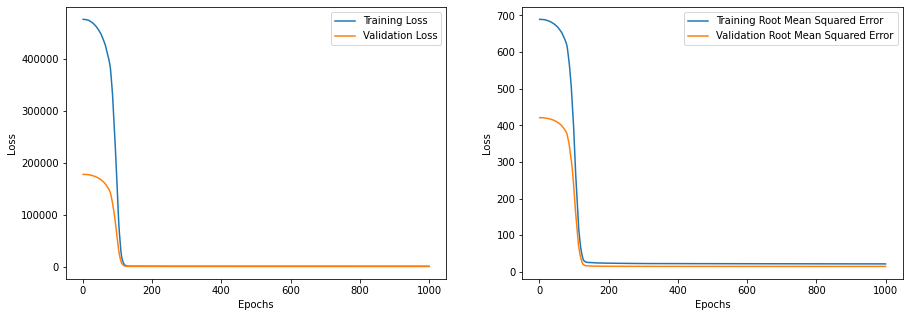

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

# Predicting Close Price of BAT

In [61]:
BAT_prediction = BAT_Model.predict(EABL_Test_X)
print(BAT_prediction.shape)

(31, 5)


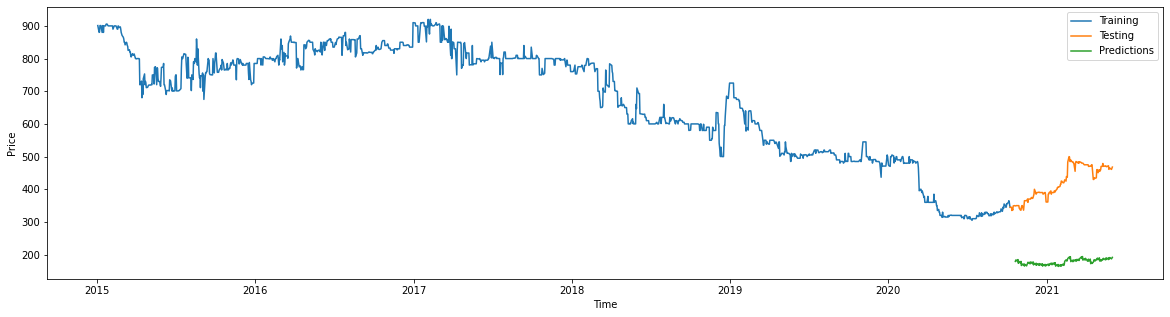

In [62]:
plt.figure(figsize=(20, 5))
plt.plot(BAT['Date'][BAT['Date'] < '2020-10-12'], BAT['Close'][BAT['Date'] < '2020-10-12'], label = 'Training')
plt.plot(BAT['Date'][BAT['Date'] >= '2020-10-09'], BAT['Close'][BAT['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(BAT['Date'][BAT['Date'] >= '2020-10-20'], BAT_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc = 'best')

In [63]:
rmse = math.sqrt(mean_squared_error(BAT_Test_Y.reshape(-1, 5), BAT_prediction))
mape = np.mean(np.abs(BAT_prediction - BAT_Test_Y.reshape(-1, 5))/np.abs(BAT_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 248.17050730010496
MAPE: 0.5745952165140447


# KCB

In [64]:
KCB.head()

,Date,Open,High,Low,Close,VWAP,Adjusted,Volume
0,2015-01-02,56.0,58.0,56.0,58.0,57.0,57.0,651500.0
1,2015-01-05,58.0,58.0,56.0,56.5,56.5,56.5,146400.0
2,2015-01-06,56.5,56.5,56.0,56.0,56.0,56.0,986800.0
3,2015-01-07,56.0,56.5,56.0,56.5,56.0,56.0,148600.0
4,2015-01-08,56.5,57.0,56.0,56.0,56.0,56.0,657000.0


In [65]:
KCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1598 non-null   datetime64[ns]
 1   Open      1598 non-null   float64       
 2   High      1598 non-null   float64       
 3   Low       1598 non-null   float64       
 4   Close     1598 non-null   float64       
 5   VWAP      1598 non-null   float64       
 6   Adjusted  1598 non-null   float64       
 7   Volume    1598 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 100.0 KB


In [66]:
KCB_Date = '2020-10-12'
KCB_Train_X, KCB_Train_Y, KCB_Test_X, KCB_Test_Y = Dataset(KCB, KCB_Date)

# Modelling

In [67]:
KCB_Model=Model()

In [68]:
KCB_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])
KCB_Model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 5, 200)            161600    
_________________________________________________________________
lstm_11 (LSTM)               (None, 200)               320800    
_________________________________________________________________
dense_20 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_22 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 255       
Total params: 548,005
Trainable params: 548,005
Non-trainable params: 0
________________________________________________

In [69]:
KCB_hist = KCB_Model.fit(KCB_Train_X, KCB_Train_Y, epochs = 1000, validation_data = (KCB_Test_X, KCB_Test_Y), callbacks=[callback])

Epoch 1/1000
9/9 [==============================] - 3s 58ms/step - loss: 1820.2227 - root_mean_squared_error: 42.6641 - val_loss: 1488.1736 - val_root_mean_squared_error: 38.5769
Epoch 2/1000
9/9 [==============================] - 0s 19ms/step - loss: 1820.2089 - root_mean_squared_error: 42.6639 - val_loss: 1488.1527 - val_root_mean_squared_error: 38.5766
Epoch 3/1000
9/9 [==============================] - 0s 20ms/step - loss: 1820.1627 - root_mean_squared_error: 42.6634 - val_loss: 1488.1111 - val_root_mean_squared_error: 38.5760
Epoch 4/1000
9/9 [==============================] - 0s 20ms/step - loss: 1820.0840 - root_mean_squared_error: 42.6624 - val_loss: 1488.0492 - val_root_mean_squared_error: 38.5752
Epoch 5/1000
9/9 [==============================] - 0s 19ms/step - loss: 1819.9755 - root_mean_squared_error: 42.6612 - val_loss: 1487.9667 - val_root_mean_squared_error: 38.5742
Epoch 6/1000
9/9 [==============================] - 0s 18ms/step - loss: 1819.8295 - root_mean_squared_er

Epoch 92/1000
9/9 [==============================] - 0s 18ms/step - loss: 258.4695 - root_mean_squared_error: 16.0770 - val_loss: 210.4357 - val_root_mean_squared_error: 14.5064
Epoch 93/1000
9/9 [==============================] - 0s 18ms/step - loss: 235.2457 - root_mean_squared_error: 15.3377 - val_loss: 189.0816 - val_root_mean_squared_error: 13.7507
Epoch 94/1000
9/9 [==============================] - 0s 18ms/step - loss: 217.2310 - root_mean_squared_error: 14.7388 - val_loss: 172.0179 - val_root_mean_squared_error: 13.1156
Epoch 95/1000
9/9 [==============================] - 0s 18ms/step - loss: 201.2913 - root_mean_squared_error: 14.1877 - val_loss: 158.2187 - val_root_mean_squared_error: 12.5785
Epoch 96/1000
9/9 [==============================] - 0s 18ms/step - loss: 186.5838 - root_mean_squared_error: 13.6596 - val_loss: 145.9457 - val_root_mean_squared_error: 12.0808
Epoch 97/1000
9/9 [==============================] - 0s 18ms/step - loss: 172.8580 - root_mean_squared_error: 

Epoch 139/1000
9/9 [==============================] - 0s 19ms/step - loss: 8.0420 - root_mean_squared_error: 2.8359 - val_loss: 2.5510 - val_root_mean_squared_error: 1.5972
Epoch 140/1000
9/9 [==============================] - 0s 19ms/step - loss: 7.8898 - root_mean_squared_error: 2.8089 - val_loss: 2.4927 - val_root_mean_squared_error: 1.5788
Epoch 141/1000
9/9 [==============================] - 0s 19ms/step - loss: 7.7760 - root_mean_squared_error: 2.7886 - val_loss: 2.3920 - val_root_mean_squared_error: 1.5466
Epoch 142/1000
9/9 [==============================] - 0s 19ms/step - loss: 7.6307 - root_mean_squared_error: 2.7624 - val_loss: 2.3420 - val_root_mean_squared_error: 1.5304
Epoch 143/1000
9/9 [==============================] - 0s 20ms/step - loss: 7.5035 - root_mean_squared_error: 2.7393 - val_loss: 2.3433 - val_root_mean_squared_error: 1.5308
Epoch 144/1000
9/9 [==============================] - 0s 20ms/step - loss: 7.3889 - root_mean_squared_error: 2.7183 - val_loss: 2.2618 

9/9 [==============================] - 0s 21ms/step - loss: 4.8489 - root_mean_squared_error: 2.2020 - val_loss: 1.5769 - val_root_mean_squared_error: 1.2557
Epoch 234/1000
9/9 [==============================] - 0s 19ms/step - loss: 4.8433 - root_mean_squared_error: 2.2007 - val_loss: 1.5747 - val_root_mean_squared_error: 1.2549
Epoch 235/1000
9/9 [==============================] - 0s 19ms/step - loss: 4.8361 - root_mean_squared_error: 2.1991 - val_loss: 1.5750 - val_root_mean_squared_error: 1.2550
Epoch 236/1000
9/9 [==============================] - 0s 19ms/step - loss: 4.8333 - root_mean_squared_error: 2.1985 - val_loss: 1.5739 - val_root_mean_squared_error: 1.2546
Epoch 237/1000
9/9 [==============================] - 0s 20ms/step - loss: 4.8314 - root_mean_squared_error: 2.1980 - val_loss: 1.5702 - val_root_mean_squared_error: 1.2531
Epoch 238/1000
9/9 [==============================] - 0s 20ms/step - loss: 4.8186 - root_mean_squared_error: 2.1951 - val_loss: 1.5712 - val_root_mean

9/9 [==============================] - 0s 18ms/step - loss: 4.5221 - root_mean_squared_error: 2.1265 - val_loss: 1.5130 - val_root_mean_squared_error: 1.2301
Epoch 328/1000
9/9 [==============================] - 0s 20ms/step - loss: 4.5196 - root_mean_squared_error: 2.1259 - val_loss: 1.5112 - val_root_mean_squared_error: 1.2293
Epoch 329/1000
9/9 [==============================] - 0s 20ms/step - loss: 4.5165 - root_mean_squared_error: 2.1252 - val_loss: 1.5107 - val_root_mean_squared_error: 1.2291
Epoch 330/1000
9/9 [==============================] - 0s 19ms/step - loss: 4.5139 - root_mean_squared_error: 2.1246 - val_loss: 1.5109 - val_root_mean_squared_error: 1.2292
Epoch 331/1000
9/9 [==============================] - 0s 19ms/step - loss: 4.5121 - root_mean_squared_error: 2.1242 - val_loss: 1.5116 - val_root_mean_squared_error: 1.2295
Epoch 332/1000
9/9 [==============================] - 0s 19ms/step - loss: 4.5113 - root_mean_squared_error: 2.1240 - val_loss: 1.5116 - val_root_mean

9/9 [==============================] - 0s 18ms/step - loss: 4.4018 - root_mean_squared_error: 2.0981 - val_loss: 1.4906 - val_root_mean_squared_error: 1.2209
Epoch 422/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.4000 - root_mean_squared_error: 2.0976 - val_loss: 1.4901 - val_root_mean_squared_error: 1.2207
Epoch 423/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.4001 - root_mean_squared_error: 2.0977 - val_loss: 1.4901 - val_root_mean_squared_error: 1.2207
Epoch 424/1000
9/9 [==============================] - 0s 19ms/step - loss: 4.3994 - root_mean_squared_error: 2.0975 - val_loss: 1.4895 - val_root_mean_squared_error: 1.2204
Epoch 425/1000
9/9 [==============================] - 0s 20ms/step - loss: 4.3984 - root_mean_squared_error: 2.0972 - val_loss: 1.4900 - val_root_mean_squared_error: 1.2206
Epoch 426/1000
9/9 [==============================] - 0s 19ms/step - loss: 4.3981 - root_mean_squared_error: 2.0972 - val_loss: 1.4899 - val_root_mean

9/9 [==============================] - 0s 18ms/step - loss: 4.2880 - root_mean_squared_error: 2.0708 - val_loss: 1.4709 - val_root_mean_squared_error: 1.2128
Epoch 516/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.2893 - root_mean_squared_error: 2.0711 - val_loss: 1.4705 - val_root_mean_squared_error: 1.2126
Epoch 517/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.2864 - root_mean_squared_error: 2.0704 - val_loss: 1.4708 - val_root_mean_squared_error: 1.2128
Epoch 518/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.2853 - root_mean_squared_error: 2.0701 - val_loss: 1.4710 - val_root_mean_squared_error: 1.2128
Epoch 519/1000
9/9 [==============================] - 0s 21ms/step - loss: 4.2870 - root_mean_squared_error: 2.0705 - val_loss: 1.4715 - val_root_mean_squared_error: 1.2131
Epoch 520/1000
9/9 [==============================] - 0s 19ms/step - loss: 4.2881 - root_mean_squared_error: 2.0708 - val_loss: 1.4693 - val_root_mean

9/9 [==============================] - 0s 18ms/step - loss: 4.1833 - root_mean_squared_error: 2.0453 - val_loss: 1.4506 - val_root_mean_squared_error: 1.2044
Epoch 610/1000
9/9 [==============================] - 0s 19ms/step - loss: 4.1868 - root_mean_squared_error: 2.0462 - val_loss: 1.4499 - val_root_mean_squared_error: 1.2041
Epoch 611/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.1817 - root_mean_squared_error: 2.0449 - val_loss: 1.4505 - val_root_mean_squared_error: 1.2044
Epoch 612/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.1808 - root_mean_squared_error: 2.0447 - val_loss: 1.4497 - val_root_mean_squared_error: 1.2040
Epoch 613/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.1789 - root_mean_squared_error: 2.0442 - val_loss: 1.4512 - val_root_mean_squared_error: 1.2047
Epoch 614/1000
9/9 [==============================] - 0s 20ms/step - loss: 4.1779 - root_mean_squared_error: 2.0440 - val_loss: 1.4503 - val_root_mean

9/9 [==============================] - 0s 18ms/step - loss: 4.0990 - root_mean_squared_error: 2.0246 - val_loss: 1.4302 - val_root_mean_squared_error: 1.1959
Epoch 704/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.0816 - root_mean_squared_error: 2.0203 - val_loss: 1.4312 - val_root_mean_squared_error: 1.1963
Epoch 705/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.0827 - root_mean_squared_error: 2.0206 - val_loss: 1.4333 - val_root_mean_squared_error: 1.1972
Epoch 706/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.0817 - root_mean_squared_error: 2.0203 - val_loss: 1.4319 - val_root_mean_squared_error: 1.1966
Epoch 707/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.0790 - root_mean_squared_error: 2.0197 - val_loss: 1.4310 - val_root_mean_squared_error: 1.1963
Epoch 708/1000
9/9 [==============================] - 0s 18ms/step - loss: 4.0792 - root_mean_squared_error: 2.0197 - val_loss: 1.4289 - val_root_mean

9/9 [==============================] - 0s 18ms/step - loss: 4.0020 - root_mean_squared_error: 2.0005 - val_loss: 1.4154 - val_root_mean_squared_error: 1.1897
Epoch 798/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.9954 - root_mean_squared_error: 1.9989 - val_loss: 1.4098 - val_root_mean_squared_error: 1.1873
Epoch 799/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.9888 - root_mean_squared_error: 1.9972 - val_loss: 1.4104 - val_root_mean_squared_error: 1.1876
Epoch 800/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.9884 - root_mean_squared_error: 1.9971 - val_loss: 1.4128 - val_root_mean_squared_error: 1.1886
Epoch 801/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.9889 - root_mean_squared_error: 1.9972 - val_loss: 1.4129 - val_root_mean_squared_error: 1.1887
Epoch 802/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.9864 - root_mean_squared_error: 1.9966 - val_loss: 1.4112 - val_root_mean

9/9 [==============================] - 0s 18ms/step - loss: 3.9046 - root_mean_squared_error: 1.9760 - val_loss: 1.3880 - val_root_mean_squared_error: 1.1781
Epoch 892/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.9046 - root_mean_squared_error: 1.9760 - val_loss: 1.3882 - val_root_mean_squared_error: 1.1782
Epoch 893/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.9048 - root_mean_squared_error: 1.9761 - val_loss: 1.3883 - val_root_mean_squared_error: 1.1783
Epoch 894/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.9007 - root_mean_squared_error: 1.9750 - val_loss: 1.3888 - val_root_mean_squared_error: 1.1785
Epoch 895/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.9006 - root_mean_squared_error: 1.9750 - val_loss: 1.3882 - val_root_mean_squared_error: 1.1782
Epoch 896/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.8993 - root_mean_squared_error: 1.9747 - val_loss: 1.3868 - val_root_mean

9/9 [==============================] - 0s 18ms/step - loss: 3.8179 - root_mean_squared_error: 1.9539 - val_loss: 1.3654 - val_root_mean_squared_error: 1.1685
Epoch 986/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.8172 - root_mean_squared_error: 1.9538 - val_loss: 1.3649 - val_root_mean_squared_error: 1.1683
Epoch 987/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.8152 - root_mean_squared_error: 1.9533 - val_loss: 1.3654 - val_root_mean_squared_error: 1.1685
Epoch 988/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.8191 - root_mean_squared_error: 1.9542 - val_loss: 1.3626 - val_root_mean_squared_error: 1.1673
Epoch 989/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.8170 - root_mean_squared_error: 1.9537 - val_loss: 1.3689 - val_root_mean_squared_error: 1.1700
Epoch 990/1000
9/9 [==============================] - 0s 18ms/step - loss: 3.8162 - root_mean_squared_error: 1.9535 - val_loss: 1.3638 - val_root_mean

In [70]:
history_dict = KCB_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

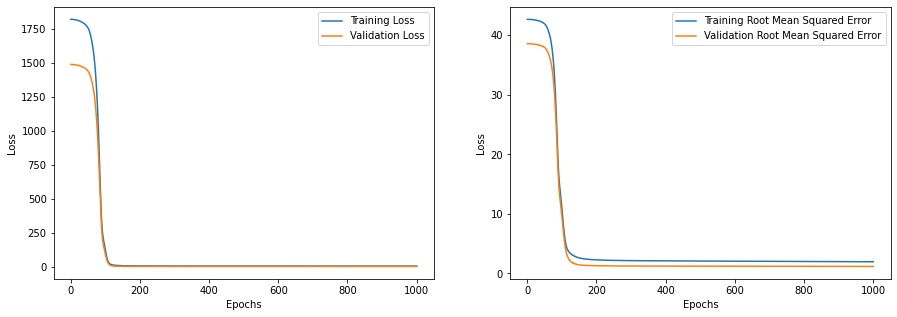

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

# Predicting Close Prices of KCB

In [73]:
KCB_prediction = KCB_Model.predict(KCB_Test_X)
print(KCB_prediction.shape)
print(KCB_prediction.reshape(-1))

(31, 5)
[38.00797  37.788765 38.026684 38.069485 37.910114 37.256107 37.08838
 37.299843 37.31889  37.18106  36.914867 36.707287 36.974308 36.9793
 36.82463  35.869835 35.89701  35.94119  35.91379  35.816177 37.68949
 37.579216 37.711018 37.73739  37.625122 37.165718 37.065228 37.224697
 37.259216 37.098614 37.673325 37.491974 37.705616 37.738358 37.5949
 37.30492  37.183685 37.346752 37.37336  37.239044 37.06073  36.991795
 37.09703  37.11221  36.99974  36.93993  36.86515  36.983566 36.997795
 36.872948 37.029427 37.083027 37.062088 37.08428  36.997635 38.555996
 38.373814 38.56129  38.619984 38.467293 38.28483  38.065624 38.30154
 38.352573 38.192375 37.043545 36.90325  37.103    37.120956 36.97491
 35.94843  35.956    36.008636 35.97804  35.892414 35.991547 36.008625
 36.05407  36.029144 35.93654  37.21923  37.20594  37.244003 37.265972
 37.170303 38.047615 38.052452 38.046368 38.08941  37.995026 39.313377
 38.961037 39.31046  39.378147 39.18815  38.602028 38.46151  38.599384
 38.65

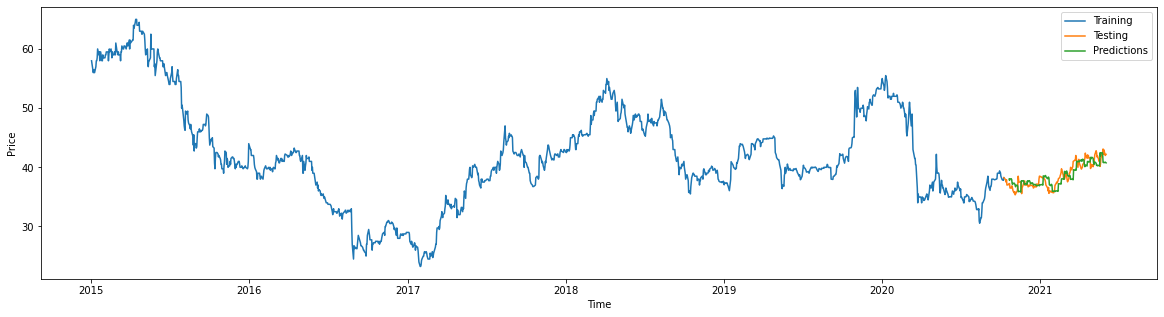

In [74]:
plt.figure(figsize=(20, 5))
plt.plot(KCB['Date'][KCB['Date'] < '2020-10-12'], KCB['Close'][KCB['Date'] < '2020-10-12'], label = 'Training')
plt.plot(KCB['Date'][KCB['Date'] >= '2020-10-09'], KCB['Close'][KCB['Date'] >= '2020-10-09'], label = 'Testing')
plt.plot(KCB['Date'][KCB['Date'] >= '2020-10-20'], KCB_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc = 'best')

In [75]:
rmse = math.sqrt(mean_squared_error(KCB_Test_Y.reshape(-1, 5), KCB_prediction))
mape = np.mean(np.abs(KCB_prediction - KCB_Test_Y.reshape(-1, 5))/np.abs(KCB_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 1.1691247525161166
MAPE: 0.02555108039791543
